<div style="border:solid green 3px; padding: 20px">
<b>🥇 Ксения, спасибо за доработки, проект принят, молодец!</b>
    
Ты провела отличную работу над ошибками! Здорово, что были обработаны и желтые комментарии! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

<div style="border:solid green 2px; padding: 20px">
Ксения, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!
    
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание, рекомендация.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделала огромную работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект  лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Импорт всех библиотек лучше делать в одной отдельной ячейке, чтобы при необходимости можно было ее перезапустить без влияния на другой код и перезаписи датафрейма. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
✔Выводить датафрейм на экран лучше в табличном виде (без использования функции `print()`), так будет гораздо понятнее и нагляднее. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

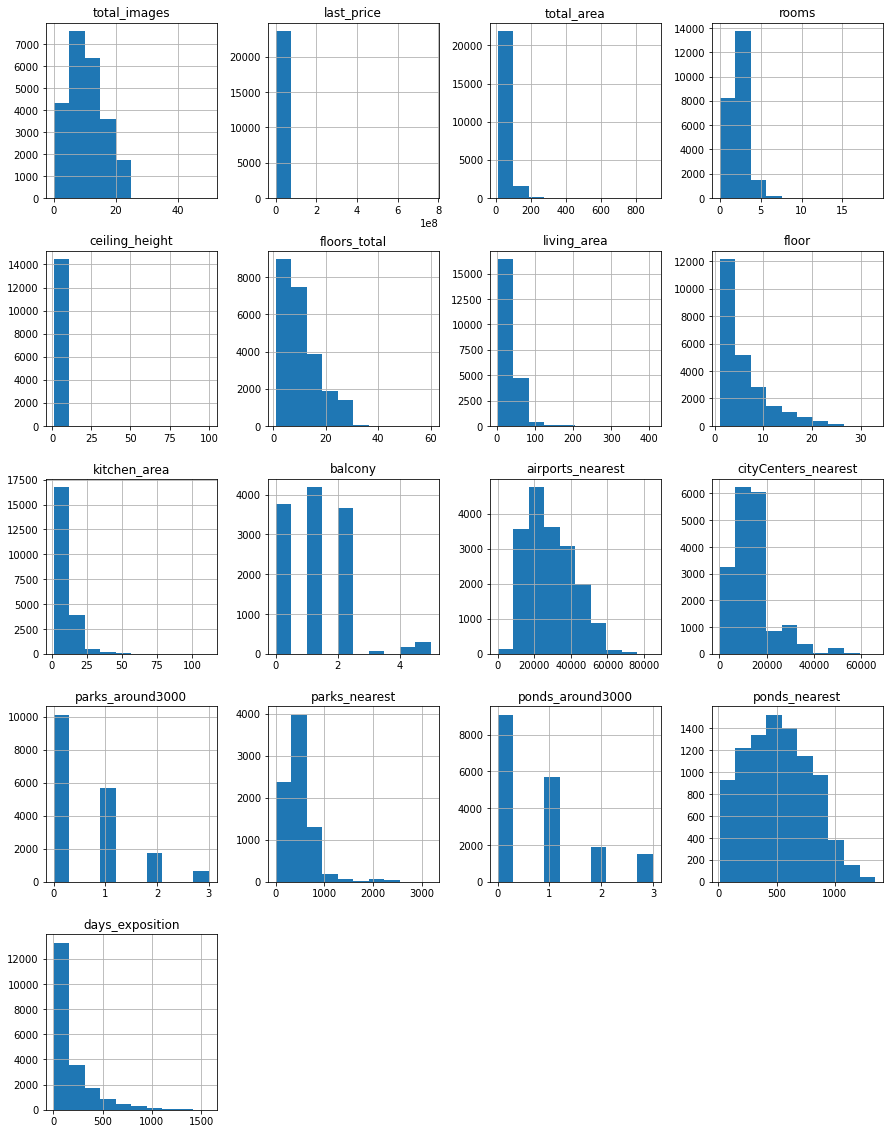

In [4]:
data.hist(figsize=(15, 20))
plt.show()

После первичного анализа данных можно отметить:
- Таблица содержит 23 699 строк и 22 столбца, что говорит о достаточном объеме для анализа.
    
- Несколько столбцов имеют значительное количество пропущенных значений:
     - ceiling_height (14 504 заполненных значений, около 39% пропусков).
     - is_apartment (2 775 заполненных значений, около 88% пропусков).
     - balcony (12 180 заполненных значений, около 49% пропусков).
     - parks_nearest и ponds_nearest имеют наибольший объем пропусков (34% и 62% соответственно).
     - Остальные столбцы, такие как living_area и kitchen_area, также имеют пропуски, но в меньшей степени.
- Типы данных в большинстве случаев соответствуют содержимому столбцов. Однако:
     - Столбец first_day_exposition имеет тип object, что не совсем корректно, так как он содержит дату. Его следует преобразовать в формат datetime для корректной работы с временными данными.
     - Для столбцов balcony, floors_total, parks_around3000, ponds_around3000, days_exposition логичнее использовать целочисленный тип (int), поскольку они представляют дискретные значения.
- Названия столбцов информативны, но можно унифицировать стиль (например, привести к нижнему регистру и использовать подчеркивания вместо заглавных букв).
- Пропуски в некоторых столбцах (ceiling_height, balcony, is_apartment) требуют обработки. 

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
✔ Чтобы перед графиком не выводился длинный список с параметрами, можно просто добавить строку `plt.show()` после строки построения графика.  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
✔ После каждого пункта нужно делать промежуточный вывод.
    
✔ Что мы можем сказать о данных после первичного знакомства  с ними? Стоит отметить объем и полноту данных, корректность наименования столбцов и соответствие типов данных.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

### Выполните предобработку данных

#### Изменение названия столбцов

Названия столбцов информативны и отражают их содержание. Однако столбец cityCenters_nearest выбивается из единообразного формата. Предлагаю изменить формат наименования на все слова с маленькой буквы через подчеркивание.


In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Изменение типов данных 

Для оценки стоимости недвижимости и эффективной работы с данными потребуется изменить типы некоторых столбцов, чтобы они соответствовали их семантике и обеспечивали корректные вычисления: 

   1.    `first_day_exposition` (object → datetime):
Это дата публикации объявления. Её нужно перевести в формат datetime, чтобы можно было выполнять операции с датами, например, вычислять длительность экспозиции.
   2.    `is_apartment` (object → int64):
Хотя колонка содержит значения, указывающие на тип объекта, правильнее использовать логический тип bool для обозначения, является ли это апартаментами (True/False). 
   3.    `balcony` (float64 → int64):
Здесь указано количество балконов, поэтому стоит изменить тип на int64, если данные не содержат дробных значений. И сразу заполним пропуски, если нет данных о балконах - 0.
   4.    `floors_total` (float64 → int64):
Если известно, что этажи никогда не дробные, можно рассмотреть перевод из float64 в int64.
   5. `parks_around3000` и `ponds_around3000` (float64 → int64):
Количество парков и водоемов не могут быть дробными, поэтому перевод из float64 в int64.
   6. `days_exposition` (float64 → int64):
Коенечно, мы можем сказать, что прошло 2,5 дня, однако стоит учитывать что данные получены автоматически из ситемы, поэтому дробных чисел в днях там не будет.

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [7]:
# Смотрим есть ли дробные и некорректные значения в данных
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [8]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [9]:
# Если есть пропуски, заменяем на 0
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')
data['balcony'] = data['balcony'].fillna(0).astype('int64')

In [10]:
# Смотрим есть ли дробные и некорректные значения в данных
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

В данных по количеству этажей в доме есть пропуски, а так же стоит проверить информацию о здании в 60 этажей. И мы не можем обработать пропуски сейчас, как по апартаментам и балконам. Необходимо подобрать оптимальный способ заполнения пропусков. сделаем это далее.

Аналогично по столбцам `parks_around3000`, `ponds_around3000` и `days_exposition`. В данных есть пропуски и изменить тип данных будет возможно, только после обработки этих пропусков.

#### Обработка пропусков в locality_name (название населенного пункта)

Местоположение объекта недвижимости играет ключевую роль в формировании стоимости недвижимости. Так как у нас неизвестно всего 49 имен населенных пунктов, а это критически важные данные, нам необходимо заполнить пропуски. Так же в нашей таблице имеются данные о расстоянии до центра и до аэропорта, которые мы можем использовать для сравнения и вычисления наиболее ближайшего населенного пункта. Для начала посмотрим есть ли данные о расстояниях у строк, где ннаселенный пунст неизвестен. 

In [11]:
missing_names = data[data['locality_name'].isna()]
len(missing_names)

49

Пропуски составляют всего 0.21% от общего объема данных (49 из 23 699 строк). Удаление такого небольшого количества строк не окажет значительного влияния на анализ и репрезентативность данных.
locality_name — ключевой столбец, который, вероятно, содержит важную информацию о населённом пункте. Без этой информации строки теряют смысловую ценность, поскольку нельзя будет связать данные с конкретным местоположением.
Таким образом, удаление 49 строк с пропущенными значениями в столбце locality_name является оправданным и позволит сохранить чистоту и целостность данных, не влияя на качество и полноту анализа.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
✔ Интересный подход, но строк с пропусками не так много и их можно сразу исключить </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [12]:
data = data.dropna(subset=['locality_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

#### Объединение населенных пунктов на г. Санкт-Петербург и Пригород

Для корректного заполнения пропусков в расстояниях предлагаю проверить названия населенных пунктов на наличие не явных дубликатов, так как это напрямую будет влияет на числовое распределение данных.

In [13]:
# Так как метод value_counts() по умолчанию отображает только топ-10 строк, настраиваем pandas для отображения всех строк
pd.set_option('display.max_rows', len(data['locality_name'].value_counts()))
data['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

In [14]:
len(data['locality_name'].unique())

364

Обработаем неявные дубликаты в названии населенных пунктов и обьединим написание по поселков.

In [15]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'поселок станции', 'городской поселок', 'поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
)
data['locality_name'].value_counts()

Санкт-Петербург                                            15721
поселок Мурино                                               556
поселок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
поселок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

In [16]:
len(data['locality_name'].unique())

318

Итого осталось 318 населенных пунктов, а значит 46 населенных пунктов имели дубликаты в названиях. 

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔ Тут  можно дополнительно сравнить количество уникальных значений до обработки названий населенных пунктов и после, чтобы увидеть результат проведенной работы. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [17]:
len(data[data['locality_name'] == 'Санкт-Петербург'])

15721

In [18]:
len(data[data['locality_name'] != 'Санкт-Петербург'])

7929

Видно, что в выбоке сильно лидирует Санкт-Петербург - больше 15 тыс строк данных. В связи с этим напрашивается вывод о разделении выборки на Санкт-Петербург и Пригород. Выборка будет более презентативная. А так же посмотрим по каким населенным пунктам отсутствуют данные о расстоянии до центра. 

#### Обработка пропусков в floors_total (всего этажей в доме)

В данных есть сведения об этаже продаваемой недвижимости. 

In [19]:
missing_floors = data[data['floors_total'].isna()]
len(missing_floors)

85

Пропуски составляют всего 0.36% от всей выборки (85 из 23 650 строк). Удаление такого небольшого количества строк не окажет значительного влияния на анализ или репрезентативность данных.
floors_total — важный столбец, так как отражает характеристики здания (общее количество этажей). Для анализа недвижимости эта информация может быть критичной, например, при оценке цен в зависимости от этажности. Строки с пропущенными значениями лишены этой ключевой информации и становятся менее полезными для анализа.
Восстановление пропусков в столбце floors_total может быть затруднительным, поскольку в большинстве случаев для этого недостаточно информации в других столбцах (например, floor или locality_name). Попытки заменить пропуски могут привести к неточностям и искажению данных.
Таким образом, удаление 85 строк с пропущенными значениями в столбце floors_total оправдано. Это минимально влияет на объем выборки, повышает чистоту и качество данных, исключает искажения и обеспечивает более точный анализ.

In [20]:
data = data.dropna(subset=['floors_total'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [21]:
data['floors_total'] = data['floors_total'].astype(int)

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
✔ Тут ситуация аналогичная пропускам в названиях населенных пунктов, строк с пропусками совсем мало и их можно исключить.  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

#### Обработка пропусков в cityCenters_nearest (расстояние до центра Санкт-Петербурга)

In [22]:
data.pivot_table(index='locality_name', values=['city_centers_nearest', 'airports_nearest'], aggfunc=['median', 'count'])

median  \
                                                   airports_nearest   
locality_name                                                         
Зеленогорск                                                 72282.0   
Колпино                                                     26232.0   
Красное Село                                                25723.5   
Кронштадт                                                   67850.0   
Ломоносов                                                   48415.5   
Павловск                                                    20529.5   
Петергоф                                                    39231.0   
Пушкин                                                      15766.0   
Санкт-Петербург                                             26763.0   
Сестрорецк                                                  56692.0   
поселок Александровская                                     12896.5   
поселок Белоостров                                          57769.0   
поселок Левашово                                            52693.0   
поселок Лисий Нос                                           55909.0   
поселок Металлострой                                        25758.0   
поселок Молодежное                                          84665.0   
поселок Парголово                                           53426.0   
поселок Песочный                                            54831.5   
поселок Петро-Славянка                                      20605.0   
поселок Понтонный                                           30642.0   
поселок Репино                                              61797.5   
поселок Саперный                                            34147.5   
поселок Стрельна                                            28317.0   
поселок Усть-Ижора                                          26510.5   
поселок Шушары                                              17427.0   
Бокситогорск                                                    NaN   
Волосово                                                        NaN   
Волхов                                                          NaN   
Всеволожск                                                      NaN   
Выборг                                                          NaN   
Высоцк                                                          NaN   
Гатчина                                                         NaN   
Ивангород                                                       NaN   
Каменногорск                                                    NaN   
Кингисепп                                                       NaN   
Кириши                                                          NaN   
Кировск                                                         NaN   
Коммунар                                                        NaN   
Кудрово                                                         NaN   
Лодейное Поле                                                   NaN   
Луга                                                            NaN   
Любань                                                          NaN   
Мурино                                                          NaN   
Никольское                                                      NaN   
Новая Ладога                                                    NaN   
Отрадное                                                        NaN   
Пикалево                                                        NaN   
Подпорожье                                                      NaN   
Приморск                                                        NaN   
Приозерск                                                       NaN   
Светогорск                                                      NaN   
Сертолово                                                       NaN   
Сланцы                                                          NaN   
Сосновый Бор                                                    NaN   
Сясьстрой     

 Данные отсутствуют по 61 объекту недвижимости в г. Санкт-Петербург, остальные пропуски все в пригороде, а так же мы видим, что по многим населенным пунктам вообще нет информации о расстоянии. Значит мы сделали верно, что разделили выборку на Питер и пригород. Рассмотрим как распределяются данные о расстоянию до центра, для принятия решения о заполнении пропусков.

##### Обработка пропусков в city_centers_nearest по г. Санкт-Петербург

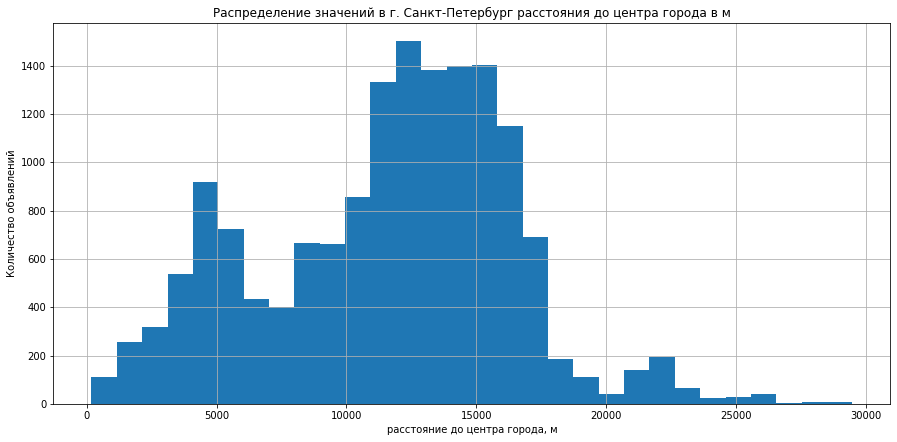

count    15591.000000
mean     11588.493939
std       4832.354845
min        181.000000
25%       8322.000000
50%      12242.000000
75%      14938.500000
max      29493.000000
Name: city_centers_nearest, dtype: float64

In [23]:
plt.figure(figsize=(15, 7))
data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'].hist(bins=30, grid=True)
plt.title('Распределение значений в г. Санкт-Петербург расстояния до центра города в м')
plt.xlabel('расстояние до центра города, м') 
plt.ylabel('Количество объявлений')
plt.show()
data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'].describe()

Выдвинем гипотезу, что расстояние до центра очень сильно влияет на стоимость. Санкт-Петербург — это крупный город с протяжённостью более 60 км с севера на юг и 30-35 км с запада на восток. Расстояние до центра (например, до Дворцовой площади) сильно варьируется:
  - Центральные районы, такие как Адмиралтейский и Василеостровский, имеют расстояние менее 5 км.
  - Отдалённые районы, такие как Сестрорецк, Колпино или Кронштадт, находятся на расстоянии 20-50 км.
Использование медианного значения (12 км) не отражает этого разнообразия.
Если заполнить все пропущенные значения одним медианным значением, это может привести к неверным выводам.

Так как пропусков у нас всего 0,4% от общей выборки по городу, я предлагаю оставить пропуски как есть. Но и не удалять эти строки.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Согласен </div>

##### Обработка пропусков в cityCenters_nearest по Пригороду

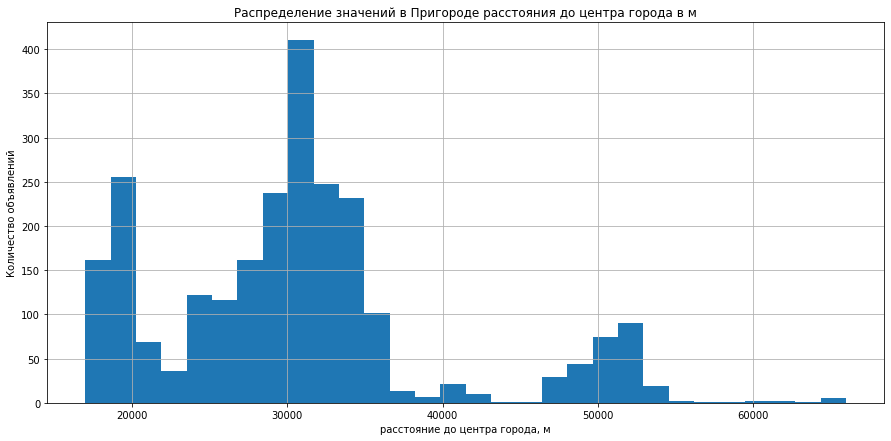

count     2473.000000
mean     30610.566114
std       9077.894034
min      17012.000000
25%      24765.000000
50%      30375.000000
75%      33719.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [24]:
plt.figure(figsize=(15, 7))
data[data['locality_name'] != 'Санкт-Петербург']['city_centers_nearest'].hist(bins=30, grid=True)
plt.title('Распределение значений в Пригороде расстояния до центра города в м')
plt.xlabel('расстояние до центра города, м') 
plt.ylabel('Количество объявлений')
plt.show()
data[data['locality_name'] != 'Санкт-Петербург']['city_centers_nearest'].describe()

Расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов, следовательно, пропуски в столбце расстояния до центра, скорее всего, связаны с тем, что для некоторых объектов координаты либо отсутствуют, либо были определены некорректно.
Так как медиана для пригорода (30 км) учитывает широкий диапазон значений (от 10 до 70 км), заполнение всех пропусков медианой может значительно исказить данные. Например, объекты, расположенные ближе к центру, будут искусственно отнесены к более удаленным районам, что может повлиять на точность анализа цен или характеристик недвижимости. Использование медианного значения может снизить точность анализа для тех задач, где расстояние до центра играет значимую роль (например, при построении модели зависимости цены от удаленности).
Пропуски в этом столбце не обязательно делают строку бесполезной, так как остальные характеристики объекта недвижимости (например, площадь, цена, количество комнат) остаются доступными для исследования.

Таким образом, пропуски в столбце расстояния до центра следует оставить без заполнения. 

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
В задании есть описание данных, где указано, что `cityCenters_nearest — расстояние до центра города`. Но не написано, что это центр Санкт-Петербурга. Следовательно имеется ввиду центр того населенного пункта, в котором находится недвижимость из объявления.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Тогда все данные, полученные автоматически на основе картографических данных оставляем без обработки, но и не удаляем (они нам пригодятся)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Все верно  </div>

#### Обработка пропусков в airports_nearest (расстояние до аэропорта)

##### Обработка пропусков в airports_nearest по г. Санкт-Петербург

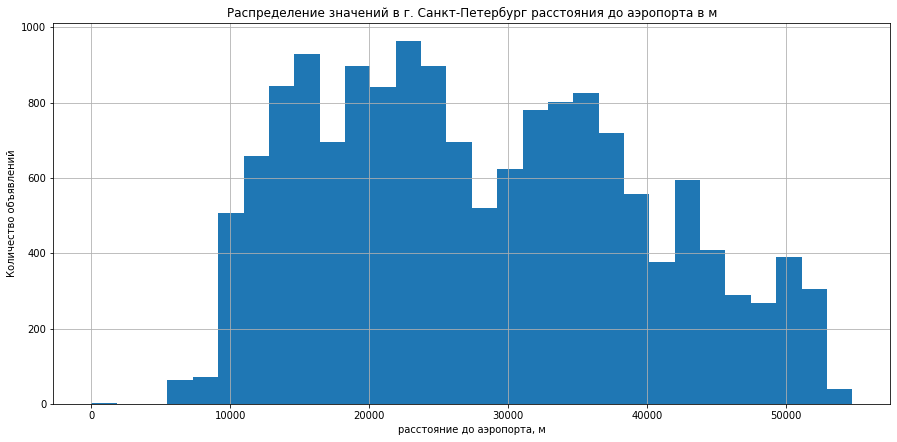

count    15567.000000
mean     28040.281621
std      11548.999483
min          0.000000
25%      18575.500000
50%      26763.000000
75%      36587.000000
max      54784.000000
Name: airports_nearest, dtype: float64

In [25]:
plt.figure(figsize=(15, 7))
data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].hist(bins=30, grid=True)
plt.title('Распределение значений в г. Санкт-Петербург расстояния до аэропорта в м')
plt.xlabel('расстояние до аэропорта, м') 
plt.ylabel('Количество объявлений')
plt.show()
data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].describe()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
✔ Необходимо подписывать название для каждого графика и оси на нем. Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), которая подскажет как это правильно сделать). </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Заполнение пропущенных значений в расстоянии до аэропорта медианным значением 26 км для недвижимости в Санкт-Петербурге может быть не вполне корректным, даже при учёте того, что пропусков всего 81 из 15,759 (≈0.5% от данных).
Санкт-Петербург — большой город с различным расстоянием от разных районов до аэропорта Пулково:
-  Центральные районы (например, Адмиралтейский, Центральный) находятся всего в 12-15 км от аэропорта.
-  Южные районы (например, Московский, Фрунзенский) ещё ближе — 5-10 км.
-  Северные районы (Калининский, Выборгский) находятся на расстоянии 30-35 км.
-  Западные районы (например, Приморский) также варьируют — 25-40 км.

Медиана 26 км может быть слишком высокой для южных районов и центра, и слишком низкой для северных и западных районов.
Хотя пропусков относительно немного, и они составляют только 0.5% от общего объёма данных, заполнение всех их одним значением снижает вариативность данных, что может искажать распределение признака и уменьшать точность анализа, если гипотеза, что airports_nearest — значимый предиктор, подтвердится.
Поэтому я оставлю эти пропуски в данных без обработки.

##### Обработка пропусков в airports_nearest по Пригороду

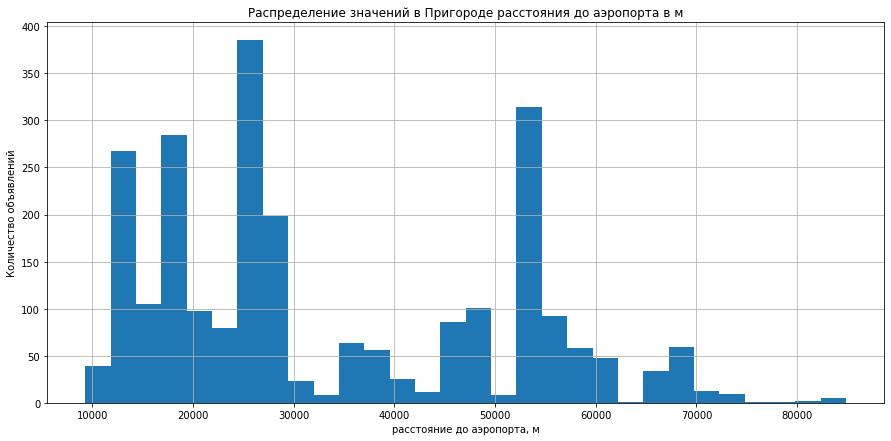

count     2474.000000
mean     33559.056184
std      17270.512107
min       9294.000000
25%      18544.500000
50%      26725.500000
75%      52610.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [26]:
plt.figure(figsize=(15, 7))
data[data['locality_name'] != 'Санкт-Петербург']['airports_nearest'].hist(bins=30, grid=True)
plt.title('Распределение значений в Пригороде расстояния до аэропорта в м')
plt.xlabel('расстояние до аэропорта, м') 
plt.ylabel('Количество объявлений')
plt.show()
data[data['locality_name'] != 'Санкт-Петербург']['airports_nearest'].describe()

Распределение расстояний до аэропорта в данном случае явно несимметричное и многомодальное, что видно по графику (распределение имеет несколько “горбов”). Это критически важно учитывать при заполнении пропусков, так как:
   1.    Медиана не учитывает особенности распределения:
Медиана — это всего лишь одно число, которое не учитывает особенности многомодального распределения. Если использовать медиану для заполнения, то все пропущенные значения получат одинаковую “среднюю” величину, что может сильно исказить данные, особенно в случаях, когда населённый пункт относится к одной из отдалённых групп.
   2.    Примерные расстояния по карте сохраняют географическую логику:
Влияние расстояния до аэропорта на стоимость недвижимости может сильно отличаться для близких и далёких пригородов. Заполнение пропусков примерным расстоянием позволит учитывать реальные географические особенности каждого населённого пункта, что критически важно для анализа.
   3.    Многомодальность предполагает разные группы объектов:
На графике видно, что расстояния группируются по районам или категориям населённых пунктов. Заполнение медианой уничтожит эти закономерности и снизит точность оценки связи между расстоянием до аэропорта и стоимостью недвижимости.
   4.    Влияние на стоимость недвижимости:
Гипотеза о значительном влиянии расстояния на стоимость подразумевает, что точные данные (или максимально приближённые к ним) важны для построения адекватной модели. Условное округление расстояния до аэропорта для каждого населённого пункта позволит избежать ввода в модель ложных данных.
  
С помощью chat GPT мы сделали таблицу с примерным расстоянием до аэропорта по населенным пунктам, в которых эти данные отсутствуют.

In [27]:
data[data['airports_nearest'].isna()]['locality_name'].unique()

array(['поселок Янино-1', 'поселок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар', 'поселок Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург', 'поселок Лебяжье',
       'поселок Сиверский', 'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино',
       'Кудрово', 'поселок Романовка', 'поселок Бугры', 'поселок Рощино',
       'Кириши', 'Луга', 'Волосово', 'Отрадное', 'село Павлово',
       'поселок Оред

In [28]:
airports = [
    ('поселок янино-1', 25),
    ('поселок мурино', 35),
    ('сертолово', 45),
    ('деревня кудрово', 20),
    ('коммунар', 25),
    ('поселок красный бор', 30),
    ('гатчина', 40),
    ('деревня федоровское', 30),
    ('выборг', 135),
    ('кировск', 55),
    ('деревня новое девяткино', 40),
    ('санкт-петербург', 20),
    ('поселок лебяжье', 70),
    ('поселок сиверский', 65),
    ('поселок молодцово', 50),
    ('поселок кузьмоловский', 40),
    ('садовое товарищество новая ропша', 25),
    ('деревня пикколово', 80),
    ('всеволожск', 35),
    ('волхов', 100),
    ('кингисепп', 120),
    ('приозерск', 140),
    ('деревня куттузи', 30),
    ('поселок аннино', 15),
    ('поселок ефимовский', 130),
    ('поселок плодовое', 85),
    ('деревня заклинье', 95),
    ('поселок торковичи', 105),
    ('поселок первомайское', 50),
    ('сясьстрой', 110),
    ('деревня старая', 35),
    ('деревня лесколово', 60),
    ('поселок новый свет', 70),
    ('сланцы', 170),
    ('село путилово', 50),
    ('ивангород', 155),
    ('мурино', 35),
    ('шлиссельбург', 50),
    ('никольское', 30),
    ('сосновый бор', 70),
    ('деревня оржицы', 45),
    ('деревня кальтино', 40),
    ('кудрово', 20),
    ('поселок романовка', 45),
    ('поселок бугры', 30),
    ('поселок рощино', 85),
    ('кириши', 90),
    ('луга', 130),
    ('волосово', 90),
    ('отрадное', 35),
    ('село павлово', 40),
    ('поселок оредеж', 90),
    ('село копорье', 110),
    ('тихвин', 190),
    ('поселок победа', 100),
    ('деревня нурма', 70),
    ('поселок синявино', 60),
    ('поселок шушары', 15),
    ('тосно', 40),
    ('бокситогорск', 160),
    ('деревня лопухинка', 85),
    ('пикалево', 180),
    ('поселок терволово', 40),
    ('поселок советский', 75),
    ('подпорожье', 230),
    ('поселок петровское', 80),
    ('поселок токсово', 45),
    ('поселок сельцо', 75),
    ('поселок вырица', 65),
    ('деревня кипень', 50),
    ('деревня келози', 50),
    ('деревня вартемяги', 50),
    ('поселок тельмана', 40),
    ('поселок севастьяново', 60),
    ('поселок большая ижора', 70),
    ('поселок павлово', 35),
    ('деревня агалатово', 50),
    ('поселок новогорелово', 20),
    ('поселок лесогорский', 80),
    ('деревня лаголово', 30),
    ('поселок цвелодубово', 90),
    ('поселок рахья', 35),
    ('деревня белогорка', 60),
    ('поселок заводской', 70),
    ('поселок новоселье', 25),
    ('деревня большие колпаны', 65),
    ('деревня горбунки', 45),
    ('деревня батово', 60),
    ('деревня заневка', 25),
    ('деревня иссад', 110),
    ("Приморск", 100),
    ("Поселок Федоровское", 120),
    ("Деревня Мистолово", 95),
    ("Новая Ладога", 130),
    ("Поселок Зимитицы", 110),
    ("Поселок Барышево", 115),
    ("Деревня Разметелево", 105),
    ("Поселок имени Свердлова", 90),
    ("Деревня Пеники", 95),
    ("Поселок Рябово", 85),
    ("Деревня Пудомяги", 120),
    ("Поселок Корнево", 100),
    ("Деревня Низино", 110),
    ("Деревня Бегуницы", 125),
    ("Поселок Поляны", 95),
    ("Поселок Мга", 100),
    ("Поселок Елизаветино", 110),
    ("Поселок Кузнечное", 115),
    ("Деревня Колтуши", 105),
    ("Поселок Запорожское", 90),
    ("Деревня Гостилицы", 120),
    ("Деревня Малое Карлино", 85),
    ("Поселок Мичуринское", 130),
    ("Поселок имени Морозова", 110),
    ("Поселок Сосново", 105),
    ("Деревня Аро", 95),
    ("Поселок Ильичево", 100),
    ("Поселок Тайцы", 110),
    ("Деревня Малое Верево", 95),
    ("Деревня Извара", 125),
    ("Поселок Вещево", 120),
    ("Село Паша", 105),
    ("Деревня Калитино", 100),
    ("Поселок Ульяновка", 115),
    ("Деревня Чудской Бор", 125),
    ("Поселок Дубровка", 110),
    ("Деревня Мины", 95),
    ("Поселок Войсковицы", 90),
    ("Деревня Коркино", 105),
    ("Поселок Ропша", 130),
    ("Поселок Приладожский", 120),
    ("Поселок Щеглово", 110),
    ("Поселок Гаврилово", 115),
    ("Лодейное Поле", 130),
    ("Деревня Рабитицы", 105),
    ("Поселок Никольский", 110),
    ("Деревня Кузьмолово", 95),
    ("Деревня Малые Колпаны", 125),
    ("Поселок Назия", 90),
    ("Поселок Углово", 100),
    ("Поселок Старая Малукса", 105),
    ("Садовое Товарищество Речья", 110),
    ("Деревня Меньково", 120),
    ("Деревня Старые Бегуницы", 115),
    ("Поселок Семрино", 125),
    ("Поселок Глажево", 130),
    ("Поселок Кобринское", 95),
    ("Деревня Гарболово", 105),
    ("Деревня Юкки", 115),
    ("Поселок Приветнинское", 100),
    ("Деревня Мануйлово", 110),
    ("Деревня Пчева", 95),
    ("Поселок Цвылево", 90),
    ("Поселок Мельниково", 100),
    ("Поселок Пудость", 110),
    ("Поселок Усть-Луга", 120),
    ("Светогорск", 100),
    ("Любань", 95),
    ("Поселок Селезнево", 90),
    ("Каменногорск", 105),
    ("Деревня Кривко", 120),
    ("Поселок Глебычево", 125),
    ("Деревня Парицы", 115),
    ("Поселок Жилпоселок", 100),
    ("Поселок Войскорово", 110),
    ("Село Никольское", 120),
    ("Поселок Стеклянный", 105),
    ("Поселок Важины", 95),
    ("Поселок Мыза-Ивановка", 110),
    ("Село Русско-Высоцкое", 105),
    ("Поселок Форносово", 125),
    ("Красное Село", 100),
    ("Село Старая Ладога", 90),
    ("Поселок Житково", 110),
    ("Поселок Виллози", 115),
    ("Деревня Лампово", 120),
    ("Деревня Шпаньково", 125),
    ("Деревня Лаврики", 115),
    ("Поселок Сумино", 100),
    ("Поселок Возрождение", 105),
    ("Деревня Старосиверская", 115),
    ("Поселок Кикерино", 110),
    ("Деревня Старое Хинколово", 120),
    ("Поселок Пригородный", 100),
    ("Поселок Торфяное", 105),
    ("Поселок Будогощь", 110),
    ("Поселок Суходолье", 95),
    ("Поселок Красная Долина", 105),
    ("Деревня Хапо-Ое", 110),
    ("Поселок Дружная Горка", 95),
    ("Деревня Яльгелево", 100),
    ("Село Рождествено", 120),
    ("Деревня Старополье", 95),
    ("Деревня Сяськелево", 105),
    ("Деревня Камышовка", 110),
    ("Садоводческое Некоммерческое Товарищество Лесная Поляна", 115),
    ("Деревня Хязельки", 120),
    ("Поселок Жилгородок", 110),
    ("Деревня Ялгино", 100),
    ("Ломоносов", 90),
    ("Поселок Новый Учхоз", 110),
    ("Поселок Гончарово", 115),
    ("Поселок Почап", 100),
    ("Поселок Саперное", 105),
    ("Поселок Платформа 69-й километр", 110),
    ("Поселок Каложицы", 120),
    ("Деревня Фалилеево", 100),
    ("Деревня Пельгора", 115),
    ("Деревня Торошковичи", 125),
    ("Поселок Алексеевка", 110),
    ("Поселок Серебрянский", 105),
    ("Поселок Лукаши", 90),
    ("Деревня Щеглово", 95),
    ("Кронштадт", 80),
    ("Деревня Тарасово", 120),
    ("Поселок Кингисеппский", 110),
    ("Поселок Ушаки", 105),
    ("Деревня Котлы", 115),
    ("Деревня Сижно", 120),
    ("Деревня Торосово", 125),
    ("Поселок Форт Красная Горка", 105),
    ("Деревня Новолисино", 110),
    ("Поселок Громово", 100),
    ("Деревня Глинка", 95),
    ("Деревня Старая Пустошь", 110),
    ("Поселок Коммунары", 120),
    ("Поселок Починок", 115),
    ("Поселок Вознесенье", 110),
    ("Деревня Разбегаево", 105),
    ("Поселок Гладкое", 110),
    ("Поселок Тесово-4", 95),
    ("Деревня Бор", 100),
    ("Поселок Коробицыно", 110),
    ("Деревня Большая Вруда", 115),
    ("Деревня Курковицы", 125),
    ("Поселок Кобралово", 110),
    ("Деревня Суоранда", 120),
    ("Поселок Кондратьево", 105),
    ("Поселок Счастье", 95),
    ("Поселок Любань", 110),
    ("Деревня Реброво", 100),
    ("Деревня Зимитицы", 105),
    ("Деревня Тойворово", 95),
    ("Поселок Семиозерье", 120),
    ("Поселок Лесное", 100),
    ("Поселок Совхозный", 110),
    ("Поселок Ленинское", 115),
    ("Поселок Суида", 125),
    ("Деревня Нижние Осельки", 100),
    ("Поселок Свирь", 110),
    ("Поселок Перово", 115),
    ("Высоцк", 120),
    ("Поселок Гарболово", 95),
    ("Село Шум", 105),
    ("Поселок Котельский", 110),
    ("Поселок Лужайка", 115),
    ("Деревня Большая Пустомержа", 125),
    ("Поселок Красносельское", 110),
    ("Деревня Вахнова Кара", 100),
    ("Деревня Пижма", 110),
    ("Поселок Кивеннапа Север", 120),
    ("Поселок Ромашки", 105),
    ("Деревня Каськово", 100),
    ("Деревня Куровицы", 115),
    ("Поселок Плоское", 110),
    ("Поселок Кирпичное", 95),
    ("Деревня Ям-Тесово", 100),
    ("Деревня Раздолье", 110),
    ("Деревня Терпилицы", 105),
    ("Поселок Шугозеро", 120),
    ("Деревня Ваганово", 115),
    ("Поселок Пушное", 110),
    ("Садовое Товарищество Садко", 125),
    ("Деревня Выскатка", 100),
    ("Поселок Свирьстрой", 105),
    ("Деревня Кисельня", 95),
    ("Деревня Трубников Бор", 120),
    ("Поселок Калитино", 100),
    ("Поселок Высокоключевой", 110),
    ("Садовое Товарищество Приладожский", 115),
    ("Поселок Пансионат Зеленый Бор", 120),
    ("Деревня Ненимяки", 110),
    ("Деревня Снегиревка", 105),
    ("Деревня Рапполово", 115),
    ("Деревня Пустынка", 110),
    ("Колпино", 95),
    ("Поселок Рабитицы", 105),
    ("Деревня Большой Сабск", 110),
    ("Деревня Русско", 95),
    ("Деревня Лупполово", 120),
    ("Деревня Большое Рейзино", 125),
    ("Деревня Малая Романовка", 100),
    ("Поселок Дружноселье", 105),
    ("Поселок Пчевжа", 110),
    ("Поселок Володарское", 95),
    ("Деревня Нижняя", 115),
    ("Деревня Тихковицы", 120),
    ("Деревня Борисова Грива", 125),
    ("Поселок Дзержинского", 130)
]

# Создание DataFrame
missing_airports = pd.DataFrame(airports, columns=['locality_name', 'airports_nearest'])
missing_airports['locality_name'] = missing_airports['locality_name'].str.lower()
missing_airports['airports_nearest'] *= 1000.00
missing_airports.head()

,locality_name,airports_nearest
0,поселок янино-1,25000.0
1,поселок мурино,35000.0
2,сертолово,45000.0
3,деревня кудрово,20000.0
4,коммунар,25000.0


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

К пропускам в расстояниях до ближайшего аэропорта такой подход вполне применим.</div>

Соединяем две таблицы и заполняем пропуски в данных. должен остаться только Санкт-Петербург.

In [29]:
# делаем названия в нижнем регистре для совпадения
data['locality_name'] = data['locality_name'].str.lower()
# Соединяем датафреймы по столбцу 'locality_name', как левое соединение (left join)
data = pd.merge(
    data, 
    missing_airports[['locality_name', 'airports_nearest']], 
    on='locality_name', 
    how='left', 
    suffixes=('', '_df2')
)

# Заполняем пропуски в столбце из второго датафрейма
data['airports_nearest'].fillna(data['airports_nearest_df2'], inplace=True)

# Убираем временный столбец 
data.drop(columns=['airports_nearest_df2'], inplace=True)

data['airports_nearest'].isna().sum()


5

Проверяем еще раз, заполнились ли у нас пропуски по airports_nearest.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Обработка пропусков в kitchen_area и  living_area (площадь кухни и жилая площадь в квадратных метрах)

 Я решила объединить заполнение пропусков по этим двум столбцам, потому что они оба зависят от количества комнат rooms и общей площади total_area. Для заполнения пропусков я выбрала использование медианного отношения living_area / total_area и kitchen_area / total_area :
   1.    Сохранение структуры данных: Использование медианного отношения позволяет сохранить пропорциональность между различными аспектами недвижимости. Это важно, потому что в реальной жизни площадь жилых и кухонных помещений часто имеет фиксированные соотношения относительно общей площади.
   2.    Медиана снижает влияние выбросов: Медиана является более устойчивой метрикой по сравнению с средним значением, так как она не так чувствительна к выбросам. В недвижимости могут быть исключительные случаи (например, очень большие или маленькие квартиры), которые могут сильно исказить среднее значение. Медиана позволяет более точно и надежно отразить типичные отношения между площадями.
   3.    Интерпретируемость: Заполнение пропусков на основе отношения площади жилья или кухни к общей площади помогает сохранить логику, лежащую в основе данных. Это улучшает интерпретируемость модели, так как сохраняется осмысленная связь между размерами разных частей квартиры и общей площадью.
   4.    Консистентность с реальными рынками недвижимости: В реальной практике недвижимости площадь жилых и кухонных помещений часто пропорциональна общей площади. Используя медиану этого отношения, мы сохраняем статистическую и логическую целостность данных.

Для начала проверим выборку на очевидные аномалии, когда сумма площадей кухни, жилой и технических повещений (туалет, коридор) превышает общую площадь. На тех. помещения считаю дростаточным допуска в 10%.

In [31]:
data.query('(living_area + kitchen_area) >= (total_area * 0.9) ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04,3,NaN,14,59.0,8,False,False,False,12.0,5,санкт-петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22,2,2.50,9,38.0,8,False,False,False,10.0,1,поселок шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14,1,2.65,9,26.1,5,False,False,False,6.2,0,санкт-петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
219,8,3890000.0,37.0,2018-07-09,1,2.50,25,28.0,6,False,False,False,9.0,0,санкт-петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
317,19,4850000.0,59.7,2015-03-19,3,2.50,5,47.4,4,False,False,False,6.4,1,санкт-петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23084,15,10150000.0,114.0,2015-01-21,4,NaN,5,90.2,4,False,False,False,16.0,0,санкт-петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23165,10,1850000.0,48.2,2019-03-13,2,NaN,5,42.2,2,False,False,False,6.0,1,высоцк,120000.0,NaN,NaN,NaN,NaN,NaN,45.0
23196,12,4299000.0,54.0,2016-11-25,2,NaN,14,40.0,8,False,False,False,10.0,0,колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23389,13,8500000.0,65.0,2018-11-01,2,NaN,4,44.0,2,False,False,False,15.3,0,санкт-петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


461 анамальное значение, при этом явных ошибок ввода, где перепутаны значения, не выявлено. Для дальнейшего корректного анализа нгеобходимо удалить эти значения.

In [32]:
data = data[~((data['living_area'] + data['kitchen_area']) >= data['total_area'] * 0.9)]

In [33]:
data.pivot_table(index='rooms', values=['kitchen_area', 'living_area'])

,kitchen_area,living_area
rooms,,
0,NaN,18.865246
1,9.518339,17.760837
2,9.883231,31.557991
3,11.150669,47.043979
4,13.418949,66.320958
5,17.775564,99.035461
6,21.083483,131.931648
7,21.998077,163.564151
8,24.866667,168.683333


Нет данных по объектам недвижимости, где rooms = 0. В некоторых случаях, когда помещение не имеет четкой планировки с отдельными комнатами (например, студия или лофт), система может записать 0, если не удалось классифицировать это как отдельные комнаты. проверим это.

In [34]:
data[data['rooms'] == 0][['studio', 'open_plan', 'kitchen_area', 'living_area']]

,studio,open_plan,kitchen_area,living_area
144,True,False,NaN,15.50
347,False,True,NaN,17.00
438,True,False,NaN,24.75
505,False,True,NaN,24.30
605,True,False,NaN,NaN
693,True,False,NaN,17.50
712,True,False,NaN,12.00
776,False,True,NaN,NaN
835,False,True,NaN,15.00
942,False,True,NaN,18.00


действительно, по студиям и свободным планировкам, мы оставляем пропуски в kitchen_area так как там нет возможности определить площадь кухни, а вот living_area вычисляем по всем обьектам.

In [35]:
# Рассчитываем медианное отношение living_area / total_area
median_ratio = (data['living_area'] / data['total_area']).median()

# Заполнение пропусков в living_area и kitchen_area
data['living_area'].fillna(data['total_area'] * median_ratio, inplace=True)

# Проверим результат
data[['living_area']].isna().sum()

living_area    0
dtype: int64

In [36]:
# Рассчитываем медианное отношение kitchen_area / total_area
median_kitchen_ratio = (data['kitchen_area'] / data['total_area']).median()

# Заполнение пропусков в kitchen_area, за исключением где rooms = 0
data.loc[data['rooms'] != 0, 'kitchen_area'] = data.loc[data['rooms'] != 0, 'kitchen_area'].fillna(
    data['total_area'] * median_kitchen_ratio
)

# Условие, где (living_area + kitchen_area) <= total_area * 0.9
mask_update_kitchen = (data['living_area'] + data['kitchen_area']) <= data['total_area'] * 0.9

# Пересчитываем kitchen_area только в этих случаях
data.loc[mask_update_kitchen, 'kitchen_area'] = data['total_area'] * 0.9 - data['living_area']

# Проверяем, есть ли еще пропуски в kitchen_area
data.loc[data['rooms'] != 0, 'kitchen_area'].isna().sum()

0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23091 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23091 non-null  int64         
 1   last_price            23091 non-null  float64       
 2   total_area            23091 non-null  float64       
 3   first_day_exposition  23091 non-null  datetime64[ns]
 4   rooms                 23091 non-null  int64         
 5   ceiling_height        14176 non-null  float64       
 6   floors_total          23091 non-null  int64         
 7   living_area           23091 non-null  float64       
 8   floor                 23091 non-null  int64         
 9   is_apartment          23091 non-null  bool          
 10  studio                23091 non-null  bool          
 11  open_plan             23091 non-null  bool          
 12  kitchen_area          22897 non-null  float64       
 13  balcony         

Таким образом, у нас остались пропуски в kitchen_area в квартрах студиях и квартрах со свободной планировкой

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Здесь все верно</div>

#### Обработка пропусков в ceiling_height (высота потолков (м))

In [38]:
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.25,  2.3 ,  2.34,  2.4 ,  2.45,
        2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,
        2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,
        2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,
        2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,
        2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,
        2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,
        3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,
        3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,
        3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,
        3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,
        3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,
        3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,
        3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,
        3.67,  3.68,

В Санкт-Петербурге средняя высота потолков в новостройках обычно составляет 2,5–2,7 метра. В экономклассе — в среднем 2,5 метра, в комфорт-классе — около 2,7 метра, а в классах «бизнес» и «элита» — от 3 метров.

Однако в историческом центре города, например в домах XIX века, построенных в стиле классицизма или модерна, высота потолков может достигать 4, 5, а иногда и 6 метров.
Соответственно все что ниже 2,5 метров это аномально низкие значения.
Так же есть высоты больше 6 метров. Так как эти данные вводились вручную, существует высокая вероятность ошибки ввода запятой. Поэтому сначала обработаем значения на устранение неявных ошибок.

In [39]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10
data['ceiling_height'].sort_values().unique()

array([1.  , 1.03, 1.2 , 1.4 , 1.75, 2.  , 2.25, 2.26, 2.3 , 2.34, 2.4 ,
       2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55,
       2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66,
       2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77,
       2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88,
       2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99,
       3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 ,
       3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22,
       3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33,
       3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45,
       3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56,
       3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69,
       3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87,
       3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Поделить на 10 можно немного проще:</div>


```python


                df.loc[df['ceiling_height'] > 10, 'ceiling_height'] /= 10

```

Так как мы имеем дело с высотой потолка в метрах, имеет смысл округлить данные до 1 знака после запятой и избавиться таким образом от неявных дубликатов в данных.

In [40]:
data['ceiling_height'] = round(data['ceiling_height'], 1)
data['ceiling_height'].sort_values().unique()

array([1. , 1.2, 1.4, 1.8, 2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
       3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.2, 5.3, 5.5, 5.6, 5.8,
       6. , 8. , 8.3, nan])

In [41]:
data[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 6)]['ceiling_height'].value_counts()

2.4    37
2.0    11
2.3     5
8.0     3
1.0     2
1.8     1
2.2     1
8.3     1
1.2     1
1.4     1
Name: ceiling_height, dtype: int64

Теперь, с учетом полученной информации, что потолок не может быть ниже 2,5 метров и выше 6 метров, обьем выборки составляют всего лишь 0,3% общей выборки я предлагаю удалить эти данные как некорректные.

In [42]:
# Удаляем строки где высота потолка меньше 2.5 и больше 6 или не NaN
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 6) | (pd.isna(data['ceiling_height']))]
data['ceiling_height'].sort_values().unique()

array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ,
       5.2, 5.3, 5.5, 5.6, 5.8, 6. , nan])

In [43]:
data['ceiling_height'].isna().sum()

8915

Заполнение пропусков в данных должно учитывать их структуру и логику. Поэтому я выбрала способ заполнения медианой по городу (Петербург и пригород). Это упростит процесс заполнения данных без значительной потери точности.

In [44]:
data['ceiling_height'] = data['ceiling_height'].fillna(
    data.groupby(data['locality_name'] == 'Санкт-Петербург')['ceiling_height'].transform('median')
)

# Проверяем оставшиеся пропуски
data['ceiling_height'].isna().sum()

0

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Кстати, для подобного рода заполнения пропусков с группировкой отлично подходит метод `transform`. Он позволяет сделать это в одну строку.

Вот [отличная статья](https://dfedorov.spb.ru/pandas/Понимание%20функции%20transform%20в%20Pandas.html), которая объясняет принцип работы метода. Очень советую)</div>

#### Обработка пропусков в parks_around3000 и ponds_around3000 (число парков и число водоемов в радиусе 3 км)

Если данные получены автоматически из карт, то отсутствие значения (NaN) может означать, что парков или водоёмов в радиусе 3 км действительно нет. В таком случае логично заменить NaN на 0. однако сначала нужно проверить, если у таких Nan данные по расстоянию до ближайшего парка. Если это расстояние меньше 3000 м, то возиожно есть место технической ошибке.

In [45]:
missing_parks = data[data['parks_around3000'].isna()]
missing_parks['parks_nearest'].sort_values().unique()

array([nan])

In [46]:
missing_ponds = data[data['ponds_around3000'].isna()]
missing_parks['ponds_nearest'].sort_values().unique()

array([nan])

Значит явных ошибок в данных нет, соответственно считаю опитамильным указать вместо NaN - 0. И После заполнения пропусков сразу меняем тип данных на целочисленный.

In [47]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_around3000'].isna().sum()

0

In [48]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_around3000'].isna().sum()

0

#### Обработка пропусков в parks_nearest и ponds_nearest (расстояние до ближайшего парка и водоемов в м)

Эти данные так же получены автоматически из карт, и отсутствие значения (NaN) может означать, что ближайшего парков или водоёмов просто нет. В данном случае мы не можем щзаменить NaN на 0, ведь это будет означать, что до парка или водоема просто 0м. Сначала я считаю правильным проверить, если у таких Nan данные по количеству парков в радиусе 3 км. Если система определила что парков нет, то я оставляю эти NaN так как они логически оправданы - нет тела нет дела, или в нашем случае нет парка - нет расстояния до парка.

In [49]:
missing_parks_nearest = data[data['parks_nearest'].isna()]
missing_parks_nearest['parks_around3000'].unique()

array([0])

In [50]:
missing_ponds_nearest = data[data['ponds_nearest'].isna()]
missing_ponds_nearest['ponds_around3000'].unique()

array([0])

Что и требовалось доказать. Значит NaN в этих столбцах оставляем без обработкти.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Верно</div>

#### Обработка пропусков в days_exposition (сколько дней было размещено объявление от публикации до снятия)

Пропуски в столбце days_exposition составляют всего 0,13% от общей выборки, что подтверждает их незначительное влияние на общий анализ. Эти пропуски логично интерпретировать как активные объявления, поскольку данные получены автоматически из системы, которая фиксирует срок экспозиции. Если объявление все еще активно, система оставляет значение None (или NaN), так как полный срок размещения еще не определен.

Замена пропусков (например, расчет до текущей даты) нарушит логику данных, поскольку срок экспозиции для активных объявлений объективно неизвестен. Искусственное заполнение может привести к искажению анализа. к тому же, доля пропусков составляет всего 0,13% от выборки, что является статистически несущественным. Оставление этих значений пустыми минимально влияет на результаты анализа.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Верно, пропуски в количестве дней размещения означают ,что объявления были активны на момент выгрузки, то есть квартиры не были проданы. Но они могли быть проданы через день после выгрузки. А заполняя пропуски мы делаем эти квартиры "проданными" сегодня, это повлияет на результаты анализа.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправила
</div>

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23028 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23028 non-null  int64         
 1   last_price            23028 non-null  float64       
 2   total_area            23028 non-null  float64       
 3   first_day_exposition  23028 non-null  datetime64[ns]
 4   rooms                 23028 non-null  int64         
 5   ceiling_height        23028 non-null  float64       
 6   floors_total          23028 non-null  int64         
 7   living_area           23028 non-null  float64       
 8   floor                 23028 non-null  int64         
 9   is_apartment          23028 non-null  bool          
 10  studio                23028 non-null  bool          
 11  open_plan             23028 non-null  bool          
 12  kitchen_area          22834 non-null  float64       
 13  balcony         

In [52]:
# На всякий случай проверим данные на дубликаты 
data.duplicated().sum()

0

Таким образом, выполнена предобработка данных, пропуски оставлены в столбцах `kitchen_area`, `airports_nearest`, `city_сenters_nearest`, `parks_nearest`, `ponds_nearest`, `days_exposition` по обоснованным причинам описанным в разделах обработки соответствующих столбцов. Изменены типы данных в столбцах с соответствующим обоснованием.

### Добавьте в таблицу новые столбцы

Для проведения исследовательского анализа данных добавим в таблицу новые параметры:
 - Цена одного квадратного метра: делим общую цену на количество квадратных метров.
 - День недели публикации: извлекаем день недели из даты публикации.
 - Месяц публикации: извлекаем месяц публикации.
 - Год публикации: извлекаем год публикации.
 - Тип этажа: определяем тип этажа (первый, последний или другой).
 - Расстояние до центра города в км.

In [53]:
# Добавим цену одного квадратного метра
data['price_per_sqm'] = data['last_price'] / data['total_area']
# Округляем до двух знаков после запятой для удобства анализа
data['price_per_sqm'] = round(data['price_per_sqm'], 2)

# Добавим день недели публикации
data['publication_day'] = data['first_day_exposition'].dt.dayofweek  # 0 - понедельник, 1 - вторник, и т.д.

# Добавим месяц публикации
data['publication_month'] = data['first_day_exposition'].dt.month

# Добавим год публикации
data['publication_year'] = data['first_day_exposition'].dt.year

# Добавим тип этажа квартиры
# Используем функцию для классификации этажа, например, если этаж == 1, то "первый", если последний - "последний", иначе "другой"
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

# Добавим расстояние до центра города
data['distance_to_city_center'] = data['city_centers_nearest'] / 1000
# Так как у насе есть NaN в этих данных и мы не моджем изменить тип данных, округлим значения до 0 знаков после запятой
data['distance_to_city_center'] = round(data['distance_to_city_center'], 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23028 entries, 0 to 23564
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23028 non-null  int64         
 1   last_price               23028 non-null  float64       
 2   total_area               23028 non-null  float64       
 3   first_day_exposition     23028 non-null  datetime64[ns]
 4   rooms                    23028 non-null  int64         
 5   ceiling_height           23028 non-null  float64       
 6   floors_total             23028 non-null  int64         
 7   living_area              23028 non-null  float64       
 8   floor                    23028 non-null  int64         
 9   is_apartment             23028 non-null  bool          
 10  studio                   23028 non-null  bool          
 11  open_plan                23028 non-null  bool          
 12  kitchen_area             22834 n

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Дополнительные данные рассчитаны и добавлены верно! Можно приступать к исследованию🙂 </div>

### Проведите исследовательский анализ данных

#### Поиск аномалий и выбивающихся значений

Проведем детальный анализ отдельных параметров на предмет аномалий и редких, выбивающихся значений:
- общая площадь `total_area`
- жилая площадь `living_area`
- площадь кухни `kitchen_area`
- цена объекта `last_price`
- количество комнат `rooms`
- высота потолков `ceiling_height`
- тип этажа квартиры («первый», «последний», «другой») `floor_type`
- общее количество этажей в доме `floors_total`
- расстояние до центра города в метрах `cityCenters_nearest`
- расстояние до ближайшего парка `parks_nearest`

В отношении столбца `ceiling_height`, анализ был проведен на этапе предобработки, были обработаны и удалены аномальные значения для максимально корректного заполнения пропусков.

Для визуальной оценки посторим отдельнгые гистограммы, для каждого из этих параметров.

##### Общая площадь

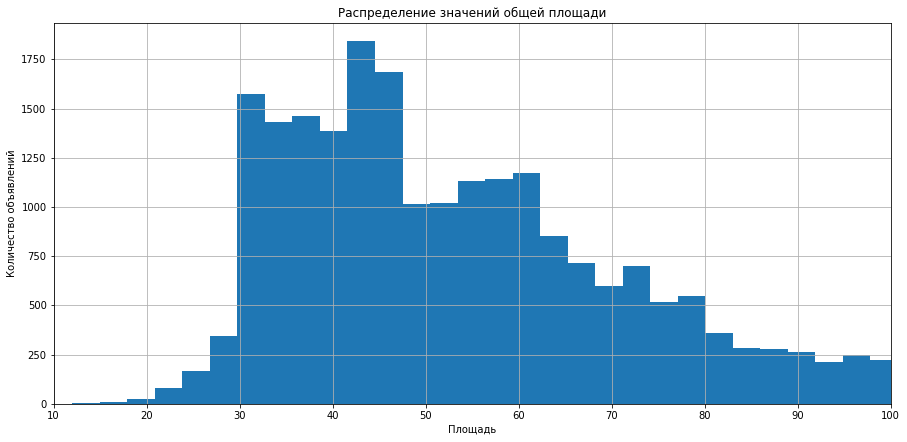

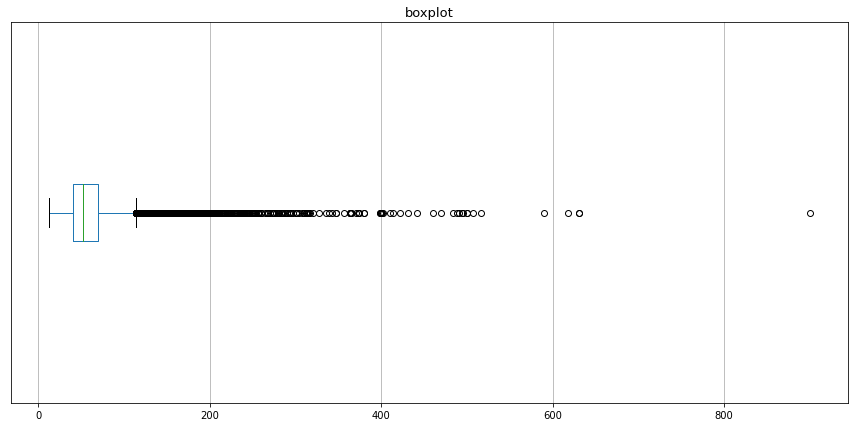

count    23028.000000
mean        60.234835
std         35.554338
min         12.000000
25%         40.000000
50%         52.000000
75%         69.547500
max        900.000000
Name: total_area, dtype: float64

In [54]:
data['total_area'].hist(bins = 300, figsize = (15, 7))
plt.xlim(10, 100)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()
plt.figure(figsize=(15, 7))
data.boxplot('total_area', vert=False)
plt.title('boxplot', size=13)
plt.yticks([])
plt.show()
data['total_area'].describe()

Распределение асимметрично (с положительным перекосом). Гистограмма показывает, что большинство значений `total_area` сосредоточены в диапазоне до 100 кв.м., но есть длинный хвост вправо.

Среднее (mean = 60.2) больше медианы (50% = 52), что также подтверждает правостороннюю асимметрию. Есть одиночные выбросы.

Максимальное значение (max = 900) значительно превышает третьий квартиль (75% = 69), что подтверждает наличие редких, но больших значений.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Здорово, что используешь метод `describe()` как дополнительный инструмент анализа.</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔ Из-за наличия больших значений графики получаются очень сжатыми и реальный диапазон значений очень сложно определить, можно рассмотреть его поближе, ограничив значения на оси с помощью `plt.xlim()`. Пример привел ниже</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

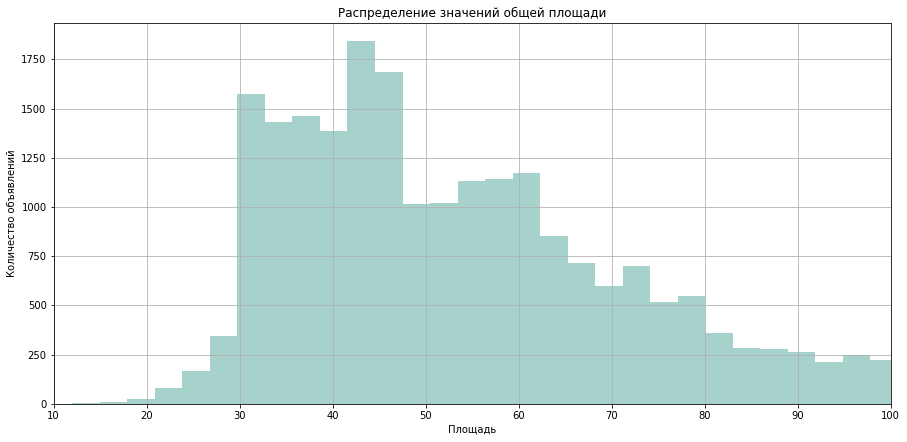

In [55]:
# код ревьюера

data['total_area'].hist(bins = 300, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 100)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

Есть несколько объектов с общей площадью до 900 квадратных метров. Крайне маловероятно, что это квартиры, возможно какие то коммерческие помещения или склады.
Для начала найдем объекты с самыми большими значениями в столбце `total_area`.

In [56]:
data.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center
19431,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.700000,25,False,False,False,400.300000,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,466666.67,2,12,2017,последний,8.0
12787,20,140000000.0,631.2,2019-04-09,7,3.9,4,322.300000,4,False,False,False,245.780000,1,санкт-петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,221799.75,1,4,2019,последний,5.0
3103,19,140000000.0,631.0,2019-03-30,7,2.6,5,357.169811,5,False,False,False,210.730189,0,санкт-петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,221870.05,5,3,2019,последний,5.0
15565,20,300000000.0,618.0,2017-12-18,7,3.4,7,258.000000,5,False,False,False,298.200000,0,санкт-петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,485436.89,0,12,2017,другой,5.0
5330,20,65000000.0,590.0,2019-02-14,15,3.5,6,409.000000,3,False,False,False,122.000000,0,санкт-петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,110169.49,3,2,2019,другой,5.0
4216,1,50000000.0,517.0,2017-10-14,7,2.6,4,332.000000,3,False,False,False,133.300000,0,санкт-петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,96711.80,5,10,2017,другой,2.0
7977,20,84000000.0,507.0,2015-12-17,5,4.4,7,301.500000,7,True,False,False,154.800000,1,санкт-петербург,20000.0,5735.0,2,110.0,0,NaN,1078.0,165680.47,3,12,2015,последний,6.0
14930,8,150000000.0,500.0,2016-01-13,4,3.2,7,283.018868,7,False,False,False,166.981132,0,санкт-петербург,33058.0,6150.0,3,209.0,3,531.0,303.0,300000.00,2,1,2016,последний,6.0
5863,3,230000000.0,500.0,2017-05-31,6,2.6,7,283.018868,7,False,False,False,166.981132,0,санкт-петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,460000.00,2,5,2017,последний,5.0
12330,20,91500000.0,495.0,2017-06-19,7,4.6,7,347.500000,7,False,False,False,98.000000,0,санкт-петербург,20000.0,5735.0,2,110.0,0,NaN,14.0,184848.48,0,6,2017,последний,6.0


Похоже, что кто-то продает недвижимость целыми этажами...
В Санкт-Петербурге есть пентхаусы и люксовые квартиры, площадь которых может превышать 500-1000 квадратных метров. Это обычно касается квартир в новых жилых комплексах класса люкс, расположенных в центре города (что подтверждается низким расстоянием до центра города) или на престижных набережных.
Например, в некоторых жилых комплексах на Васильевском острове, Петроградской стороне или на престижных набережных, площадь может достигать 1000 кв.м и больше, включая просторные террасы и уникальные планировки.

Такие объекты могут являются единичными выбросами, особенно если их площадь значительно превышает обычные значения для квартир в многоквартирных домах, а соотношение жилой площади к общей слишком низкое. В данном случае, если эти объекты явно не соответствуют типичному жилью (например, представляют собой целые этажи или комбинацию нескольких квартир), их можно рассматривать как аномальные данные, которые не подходят для общего анализа.

In [57]:
data.sort_values(by='total_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center
19795,4,2400000.0,12.0,2017-07-19,1,2.6,5,10.000000,2,False,False,False,2.062500,0,санкт-петербург,21314.0,964.0,1,886.0,2,45.0,200.0,200000.00,2,7,2017,другой,1.0
17859,3,1400000.0,13.0,2017-12-03,1,2.6,9,7.358491,1,False,False,False,4.341509,0,санкт-петербург,14350.0,15945.0,0,NaN,1,185.0,410.0,107692.31,6,12,2017,первый,16.0
19698,0,3800000.0,13.0,2018-07-04,1,2.6,5,10.000000,3,False,False,False,2.234375,0,санкт-петербург,21302.0,1242.0,1,592.0,3,27.0,9.0,292307.69,2,7,2018,другой,1.0
19437,3,1850000.0,13.0,2019-03-11,1,3.4,5,7.358491,2,False,False,False,4.341509,0,санкт-петербург,24915.0,5483.0,1,644.0,0,NaN,24.0,142307.69,0,3,2019,другой,5.0
19449,2,1686000.0,13.2,2018-12-17,1,2.6,5,7.471698,1,False,False,False,4.408302,0,санкт-петербург,19891.0,4165.0,1,361.0,1,155.0,19.0,127727.27,0,12,2018,первый,4.0
11972,5,1900000.0,15.0,2018-06-27,1,2.5,5,8.490566,1,False,False,False,5.009434,0,сосновый бор,70000.0,NaN,0,NaN,0,NaN,45.0,126666.67,2,6,2018,первый,NaN
16852,9,1550000.0,15.0,2018-08-21,1,2.7,9,8.490566,1,False,False,False,5.009434,0,санкт-петербург,51048.0,16376.0,0,NaN,1,1079.0,42.0,103333.33,1,8,2018,первый,16.0
8843,10,2450000.0,15.5,2018-08-22,0,2.6,5,10.000000,2,False,True,False,NaN,0,санкт-петербург,24326.0,4589.0,0,NaN,1,446.0,27.0,158064.52,2,8,2018,другой,5.0
9367,5,2100000.0,16.0,2017-12-10,0,2.6,6,13.000000,1,False,False,True,NaN,0,санкт-петербург,20735.0,2111.0,2,228.0,3,72.0,3.0,131250.00,6,12,2017,первый,2.0
712,5,1500000.0,17.0,2017-06-07,0,2.7,9,12.000000,1,False,True,False,NaN,0,поселок шушары,18654.0,29846.0,0,NaN,0,NaN,40.0,88235.29,2,6,2017,первый,30.0


Здесь мы видим квартиры студии, одно из самых доступных форм жилья в городе. Они имеют значительный обьем выборки, и находятся в пределах усов нашего межквартильного размаха, поэтому эти данные оставляем.

In [58]:
len(data.query('total_area > 200'))

216

На основе гистограммы распределения площади квартир и домов видно, что объекты с площадью больше 200 кв. метров значительно отклоняются от основной массы данных (1% от общей выборки). Эти объекты создают выбросы, которые искажают общую картину рынка недвижимости в Санкт-Петербурге и пригородах. Включение таких объектов в анализ может привести к необоснованным выводам и ухудшить точность прогнозов.
Боксплот также подтверждает, что большинство объектов имеют площадь в пределах до 200 кв. метров, а объекты с площадью больше 200 кв. метров находятся далеко за пределами «нормального» диапазона. Это визуально подтверждает, что такие объекты представляют собой выбросы, которые не должны учитываться при анализе.
Объекты с площадью больше 200 кв. метров, как правило, относятся к элитному жилью или коттеджным домам. В отличие от обычных квартир, такие объекты обладают совершенно другими характеристиками, которые требуют отдельного учета. 

Таким образом, отсекая объекты с общей площадью больше 200 кв. метров, мы исключаем выбросы, которые не соответствуют стандартному жилью среднего и выше среднего класса, и фокусируемся на более типичных объектах для дальнейшего анализа. Это позволяет улучшить точность анализа и избежать искажения данных, связанных с элитной недвижимостью и коттеджными комплексами.

In [59]:
sample_data = data.query('total_area <= 200')
sample_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,46.20,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,17.76,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,16.10,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,90.0,9,False,False,False,53.10,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,58.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


##### Жилая площадь

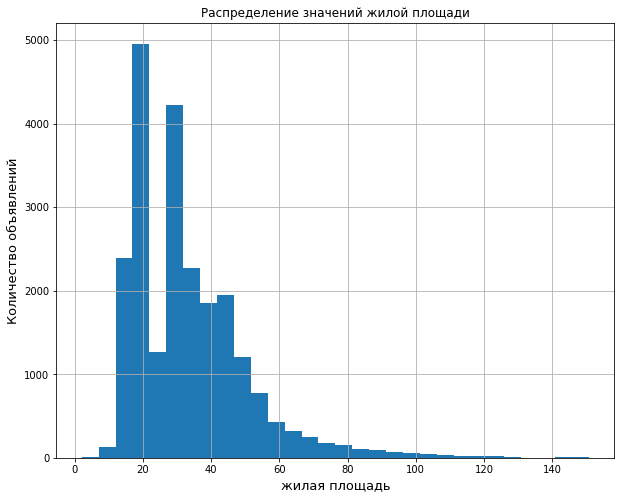

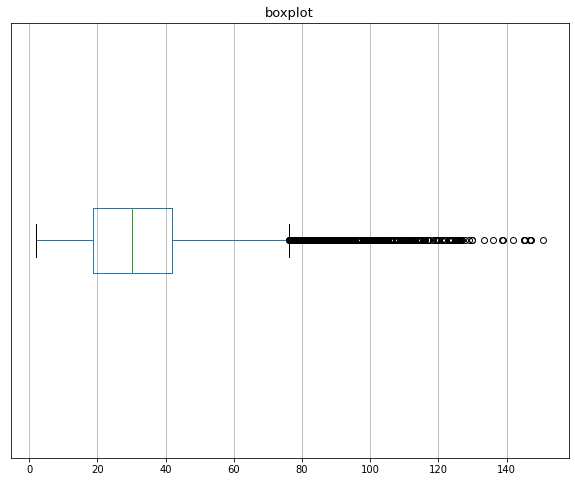

count    22812.000000
mean        33.036084
std         17.039753
min          2.000000
25%         18.800000
50%         30.000000
75%         41.800000
max        150.800000
Name: living_area, dtype: float64

In [60]:
plt.title('Распределение значений жилой площади', size=12)
plt.xlabel('жилая площадь', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['living_area'].hist(bins=30, figsize=(10, 8), grid=True)

plt.figure(figsize=(10, 8))
sample_data.boxplot('living_area', vert=False)
plt.title('boxplot', size=13)
plt.yticks([])
plt.show()
sample_data['living_area'].describe()

Распределение асимметрично (с положительным перекосом). Гистограмма показывает, что большинство значений living_area сосредоточены в диапазоне до 60, но есть длинный хвост вправо, указывающий, что у квартир с большей общей площадью заметно больше жилая площадь.
Среднее (mean = 33) больше медианы (50% = 30), что также подтверждает правостороннюю асимметрию. Присутствуют выбросы.
Boxplot показывает, что значения выше примерно 80-90 выходят за пределы “усов”, то есть являются выбросами.
Максимальное значение (max = 150) значительно превышает третьий квартиль (75% = 41), что подтверждает наличие редких, но больших значений.
Стандартное отклонение (std = 17) относительно велико по сравнению с медианой, что указывает на разброс значений.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔ Не забывай подписывать названия и оси на графиках.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

##### Площадь кухни

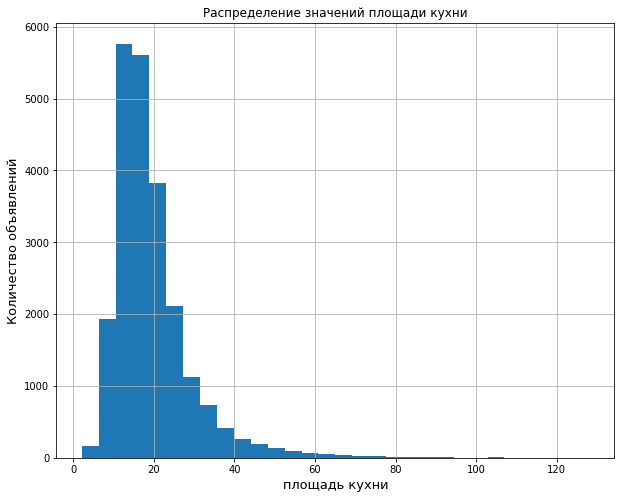

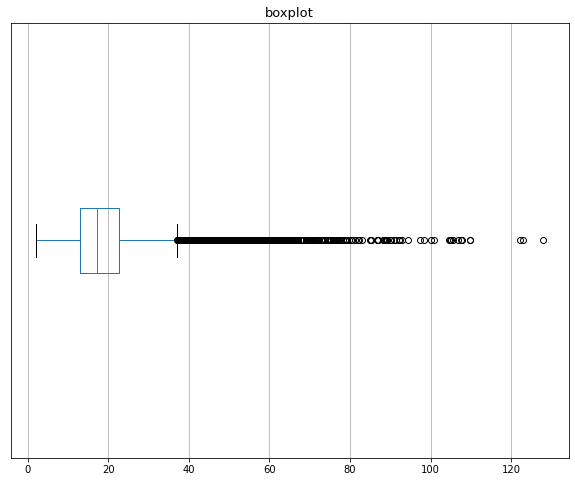

count    22619.000000
mean        19.382637
std          9.971524
min          2.062500
25%         12.900000
50%         17.100000
75%         22.600000
max        128.000000
Name: kitchen_area, dtype: float64

In [61]:
plt.title('Распределение значений площади кухни', size=12)
plt.xlabel('площадь кухни', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['kitchen_area'].hist(bins=30, figsize=(10, 8), grid=True)

plt.figure(figsize=(10, 8))
sample_data.boxplot('kitchen_area', vert=False)
plt.title('boxplot', size=13)
plt.yticks([])
plt.show()
sample_data['kitchen_area'].describe()

Большинство значений сосредоточены в диапазоне 10–30 м².
Есть длинный хвост (правосторонняя асимметрия) — несколько значений выше 40 м² и вплоть до 128 м². Это говорит о наличии редких, но очень больших значений.
По boxplot большая часть данных лежит в диапазоне от 12 до 30 м² (межквартильный размах).
   
О чем говорит длинный хвост?
   - Редкие, но очень большие кухни — возможно, элитное жильё, пентхаусы или особняки.
   - Разные категории объектов — например, смешение квартир и домов, где кухни могут быть значительно больше.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Кстати, очень круто, что так подробно все комментируешь!</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 

В таком случае мы получим кухни в 4 кв.м., возможно ли такое? В том, что площадь кухни больше жилой нет ничего удивительного. Наиболее распространенными сейчас являются квартиры с кухней-гостиной, которая может быть достаточно большой. А в жилую площадь, например, может входить лишь одна спальня, площадью 10-12 кв.м.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправила ✔
</div>

##### Цена объекта

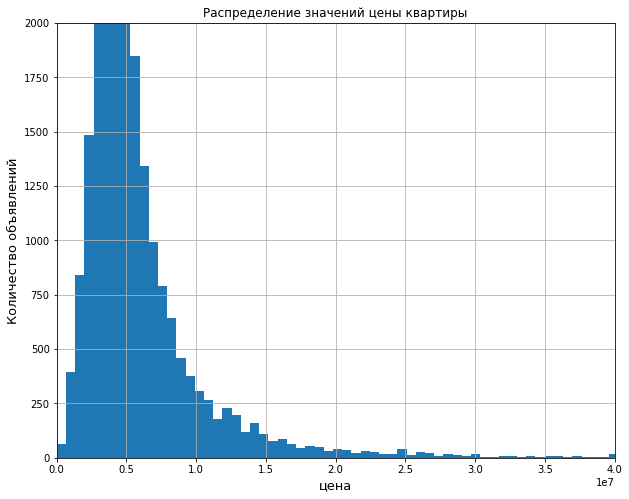

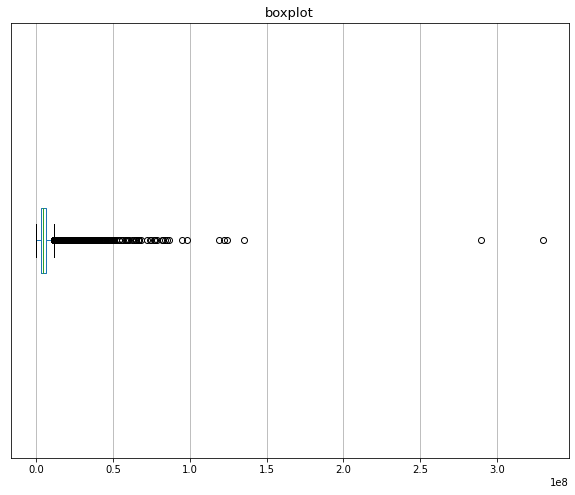

count    2.281200e+04
mean     6.006345e+06
std      6.223694e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.672500e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [62]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 40000000)
plt.ylim(0, 2000)
plt.title('Распределение значений цены квартиры', size=12)
plt.xlabel('цена', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['last_price'].hist(bins=500, figsize=(10,8), grid=True)
plt.show ()
plt.figure(figsize=(10, 8))
sample_data.boxplot('last_price', vert=False)
plt.title('boxplot', size=13)
plt.yticks([])
plt.show ()
sample_data['last_price'].describe()

Гистограмма показывает асимметричное положительное распределение с длинным хвостом вправо. Это указывает на наличие большого количества относительно небольших значений и небольшого числа очень высоких значений.
Медиана (50%) составляет 4.6 млн, тогда как среднее значение — 6.68 млн. Это говорит о том, что распределение смещено вправо из-за выбросов.

Максимальное значение достигает 332 млн, что значительно выше третьего квартиля (6.67 млн).

boxplot подтверждает наличие выбросов, которые представлены точками далеко за пределами основного диапазона данных.

Основная масса значений сосредоточена в пределах нижнего и верхнего квартилей, однако выбросы выходят далеко за эти границы.

В целом, можно заключить, что last_price имеет сильную положительную асимметрию и присутствуют значительные выбросы, которые могут требовать дополнительного анализа или обработки.

In [63]:
sample_data.sort_values(by='last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center
1431,19,330000000.0,190.0,2018-04-04,3,3.5,7,95.000000,5,False,False,False,76.000000,0,санкт-петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,1736842.11,2,4,2018,другой,1.0
22701,18,289238400.0,187.5,2019-03-19,2,3.4,6,63.700000,6,False,False,False,105.050000,0,санкт-петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,1542604.80,1,3,2019,последний,1.0
17811,17,135000000.0,166.0,2019-02-07,3,3.3,7,52.000000,1,False,False,False,97.400000,0,санкт-петербург,32863.0,5955.0,2,230.0,3,215.0,NaN,813253.01,3,2,2019,первый,6.0
4971,20,124000000.0,124.5,2017-10-12,4,3.0,4,67.200000,2,False,False,False,44.850000,0,санкт-петербург,20399.0,1722.0,3,302.0,3,172.0,45.0,995983.94,3,10,2017,другой,2.0
16552,15,122000000.0,145.0,2017-04-25,3,3.3,6,36.000000,2,False,False,False,94.500000,0,санкт-петербург,33931.0,7023.0,2,478.0,3,250.0,335.0,841379.31,1,4,2017,другой,7.0
20151,17,119000000.0,187.6,2017-07-10,4,6.0,7,147.000000,7,False,False,False,21.840000,0,санкт-петербург,26902.0,5605.0,3,484.0,1,305.0,259.0,634328.36,0,7,2017,последний,6.0
16497,10,98000000.0,155.0,2017-12-16,3,2.6,8,87.735849,6,False,False,False,51.764151,0,санкт-петербург,32440.0,5297.0,0,NaN,2,198.0,90.0,632258.06,5,12,2017,другой,5.0
11263,17,95000000.0,190.0,2019-02-10,5,3.0,7,130.000000,6,False,False,False,41.000000,0,санкт-петербург,21179.0,1032.0,3,238.0,3,31.0,18.0,500000.00,6,2,2019,другой,1.0
11977,1,86738800.0,190.0,2015-09-24,5,3.0,8,89.700000,8,False,False,False,81.300000,0,санкт-петербург,26462.0,6801.0,3,139.0,1,549.0,NaN,456520.00,3,9,2015,последний,7.0
11362,20,85000000.0,145.7,2018-08-16,3,3.4,5,87.230000,5,False,False,False,43.900000,1,санкт-петербург,28371.0,6917.0,2,165.0,2,500.0,NaN,583390.53,3,8,2018,последний,7.0


Мы видим 6 экстремальных выбросов. Чтобы сохранить данные о дорогих объектах, но без сильного смещения асссреднего и медианы, я удаляю эти выбросы.

In [64]:
sample_data = sample_data.query('last_price <= 110000000')

##### Количество комнат

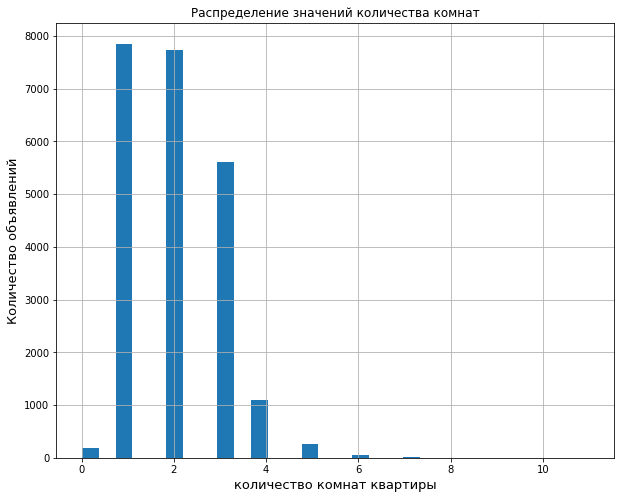

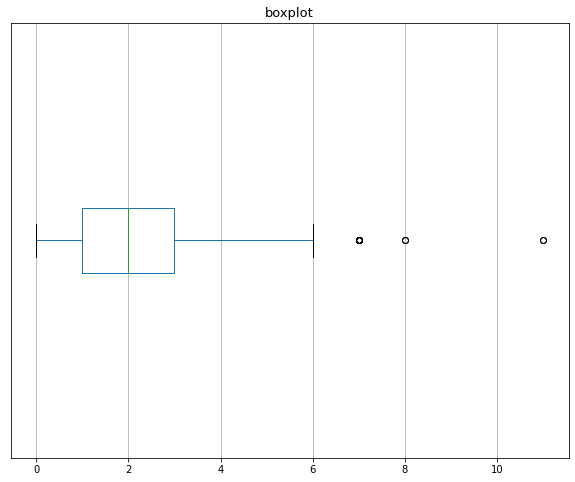

count    22806.000000
mean         2.029992
std          0.994029
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [65]:
plt.title('Распределение значений количества комнат', size=12)
plt.xlabel('количество комнат квартиры', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['rooms'].hist(bins=30, figsize=(10, 8), grid=True)

plt.figure(figsize=(10, 8))
sample_data.boxplot('rooms', vert=False)
plt.title('boxplot', size=13)
plt.yticks([])
plt.show()
sample_data['rooms'].describe()

Гистограмма показывает дискретное распределение, где наиболее частыми значениями являются 1, 2 и 3 комнаты. Большинство объектов недвижимости имеют от 1 до 4 комнат, а значения выше встречаются значительно реже. Распределение имеет небольшой положительный перекос из-за редких значений выше 5 комнат.

boxplot показывает, что основная масса данных лежит в диапазоне от 1 до 3 комнат (межквартильный размах). Однако имеются выбросы, которые выходят за пределы усов, включая значения до 11 комнат, что может быть редкими, но корректными значениями или возможными аномалиями.
   
В целом, переменная rooms имеет логичное распределение, характерное для жилой недвижимости, но присутствуют редкие значения с большим количеством комнат, требующие дополнительного анализа.

По rooms = 0 анализ был проведен на этапе предобработки по kitchen_area. Мы выяснили что это не аномалия, а студии и обьекты со свободной планировкой.

In [66]:
sample_data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center
645,3,17500000.0,183.7,2018-07-01,11,3.4,7,138.8,7,False,False,False,26.53,0,санкт-петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,95264.02,6,7,2018,последний,3.0
9642,8,33000000.0,194.1,2017-02-07,11,3.4,5,129.0,2,False,False,False,45.69,0,санкт-петербург,21469.0,1015.0,1,686.0,2,66.0,813.0,170015.46,1,2,2017,другой,1.0


Данные по объектам с 11 комнатами можно мситать вполне корректными с учетом высокой общей и жилой площади объектов.

##### Тип этажа

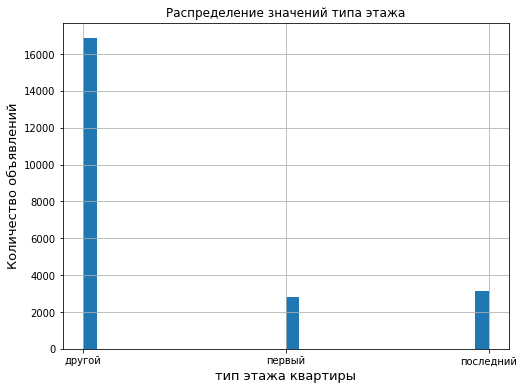

count      22806
unique         3
top       другой
freq       16858
Name: floor_type, dtype: object

In [67]:
plt.title('Распределение значений типа этажа', size=12)
plt.xlabel('тип этажа квартиры', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['floor_type'].hist(bins=30, figsize=(8, 6), grid=True)
plt.show()
sample_data['floor_type'].describe()

другой — самый распространенный тип, встречается 16858 раз, что составляет подавляющее большинство выборки. Это означает, что большинство объектов расположены не на первом и не на последнем этажах.

первый — встречается значительно реже, чуть более 2000 раз.

последний — также встречается примерно с той же частотой, что и первый этаж.

Гистограмма подтверждает, что большая часть объектов недвижимости расположена на этажах, которые не являются первыми или последними. Это типичное распределение, так как средние этажи часто считаются более предпочтительными на рынке недвижимости.

##### Общее количество этажей в доме

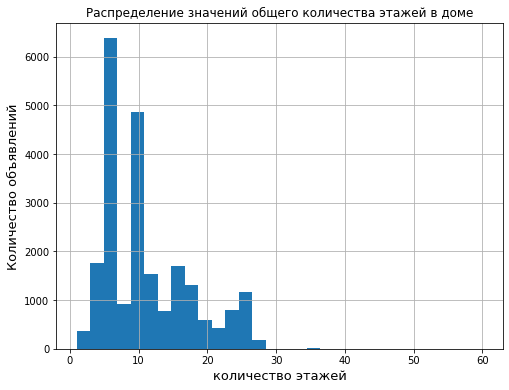

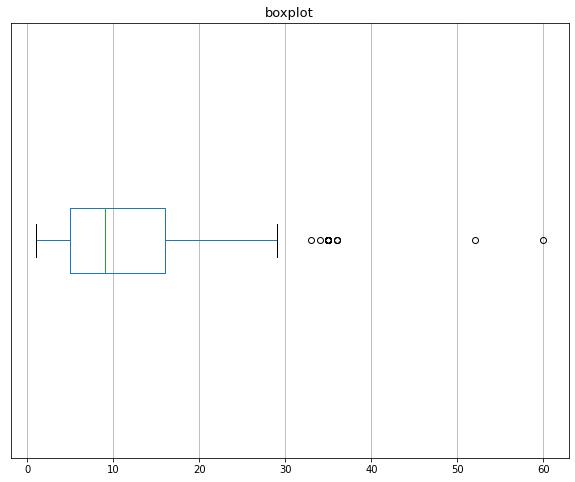

count    22806.000000
mean        10.752434
std          6.596606
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [68]:
plt.title('Распределение значений общего количества этажей в доме', size=12)
plt.xlabel('количество этажей', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['floors_total'].hist(bins=30, figsize=(8, 6), grid=True)
plt.figure(figsize=(10, 8))
sample_data.boxplot('floors_total', vert=False)
plt.title('boxplot', size=13)
plt.yticks([])
plt.show()
sample_data['floors_total'].describe()


Гистограмма показывает, что наиболее распространены здания с 5–16 этажами. Две явные группы – это низкоэтажные дома (до 10 этажей) и многоэтажные здания (от 15 и выше). Значения выше 30 этажей встречаются крайне редко.
boxplot демонстрирует, что основная масса данных сосредоточена в диапазоне от 5 до 16 этажей (межквартильный размах). Однако присутствуют выбросы, среди которых встречаются здания высотой более 30 этажей.

Медиана (50%) — 9 этажей, что говорит о том, что половина зданий имеет не более 9 этажей.

Среднее значение — 10.75 этажей, что немного выше медианы, указывая на небольшой положительный сдвиг.

Максимальное значение — 60 этажей, что сильно выбивается из общей картины и представляет собой редкий случай.

Стандартное отклонение — 6.6, что указывает на значительную изменчивость в данных.

В целом, переменная floors_total имеет умеренно асимметричное распределение с редкими, но значительными выбросами, связанными с высотными зданиями.

In [69]:
sample_data.query('floors_total > 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center
395,15,5990000.0,54.0,2018-03-22,2,2.6,36,21.400000,28,False,False,False,27.20,1,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,11.0,110925.93,3,3,2018,другой,20.0
867,14,7777777.0,75.0,2017-11-16,2,2.6,35,40.500000,23,False,False,False,27.00,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,169.0,103703.69,3,11,2017,другой,20.0
1692,11,3550000.0,28.0,2018-02-08,1,2.6,34,18.000000,23,False,False,False,7.20,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,410.0,126785.71,3,2,2018,другой,20.0
1911,13,10150000.0,74.0,2017-11-17,2,2.8,35,34.400000,30,False,False,False,32.20,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,NaN,137162.16,4,11,2017,другой,20.0
2245,12,3800000.0,45.5,2018-06-28,2,2.9,60,27.400000,4,False,False,False,13.55,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,83516.48,3,6,2018,другой,49.0
2953,9,4300000.0,37.0,2017-08-08,1,2.6,35,14.000000,15,False,False,False,19.30,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,50.0,116216.22,1,8,2017,другой,20.0
4831,12,5500000.0,50.0,2017-06-22,1,2.8,35,22.000000,4,False,False,False,23.00,0,санкт-петербург,18627.0,20339.0,1,609.0,3,145.0,537.0,110000.00,3,6,2017,другой,20.0
5720,20,3590000.0,25.0,2017-08-30,0,2.8,35,14.150943,26,False,False,True,NaN,2,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,198.0,143600.00,2,8,2017,другой,20.0
5777,17,8150000.0,80.0,2019-01-09,2,2.7,36,41.000000,13,False,False,False,31.00,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,101875.00,2,1,2019,другой,20.0
5778,12,4590000.0,43.0,2018-10-19,1,2.6,35,14.000000,11,False,False,False,24.70,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,82.0,106744.19,4,10,2018,другой,20.0


60 этажей. Гугл говорит нам что такой этажности здания нет ни в Питере ни в Пригороде. Похоже на ошибку ввода - вместо 6 указали 60. Предлагаю исправить данную аномалию.
А вот 33, 34, 35 и 36 этажные сдания встречаются.

In [70]:
sample_data.loc[2252, 'floors_total'] = 6
sample_data.loc[2252, ]

total_images                                14
last_price                           3800000.0
total_area                                44.4
first_day_exposition       2018-02-16 00:00:00
rooms                                        2
ceiling_height                             2.5
floors_total                                 6
living_area                               27.7
floor                                        3
is_apartment                             False
studio                                   False
open_plan                                False
kitchen_area                             12.26
balcony                                      0
locality_name                  санкт-петербург
airports_nearest                       25331.0
city_centers_nearest                   14207.0
parks_around3000                             0
parks_nearest                              NaN
ponds_around3000                             0
ponds_nearest                              NaN
days_expositi

##### Высота потолков

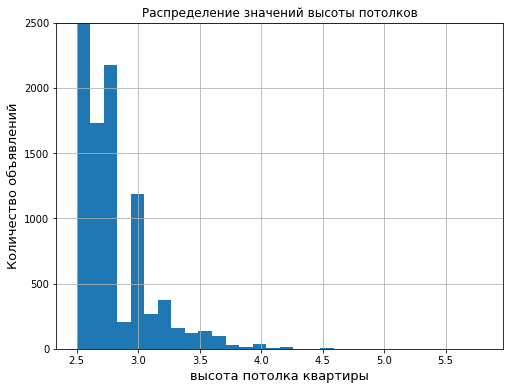

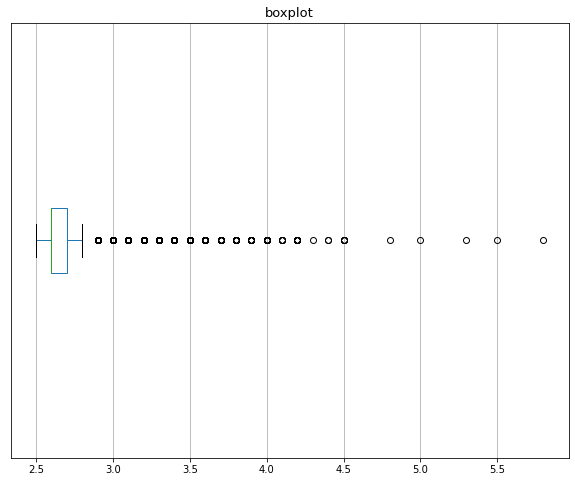

count    22806.000000
mean         2.675283
std          0.212870
min          2.500000
25%          2.600000
50%          2.600000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

In [71]:
plt.ylim(0, 2500)
plt.title('Распределение значений высоты потолков', size=12)
plt.xlabel('высота потолка квартиры', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['ceiling_height'].hist(bins=30, figsize=(8, 6), grid=True)
plt.figure(figsize=(10, 8))
plt.title('boxplot', size=13)
sample_data.boxplot('ceiling_height', vert=False)
plt.yticks([])
plt.show()
sample_data['ceiling_height'].describe()

Средняя высота потолков — 2.67 м, что соответствует стандартам массовой застройки.

Медиана (50%) — 2.6 м, что подтверждает преобладание типовой застройки с низкими потолками.
- Минимальная высота — 2.5 м, что характерно для большинства панельных домов.
- Максимальная высота — 5.8 м, что свидетельствует о наличии квартир в дореволюционных домах или элитных объектах.
Большинство значений сосредоточено в диапазоне 2.5–2.7 м, что подтверждает массовость типовой застройки.
Значения выше 3 м считаются редкостью, но все же присутствуют из-за исторических зданий и элитных новостроек.

На boxplot видно, что много выбросов выше 3 м, что логично для Петербурга, где есть большое количество квартир в старом фонде.

##### Расстояние по центра города в м

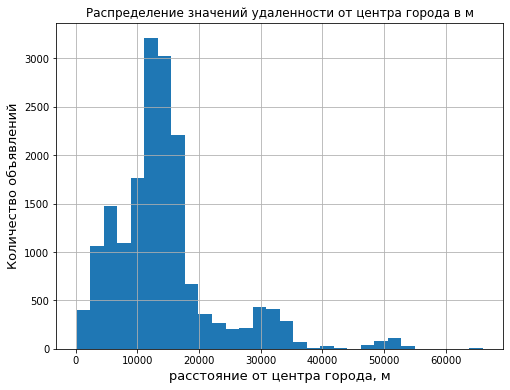

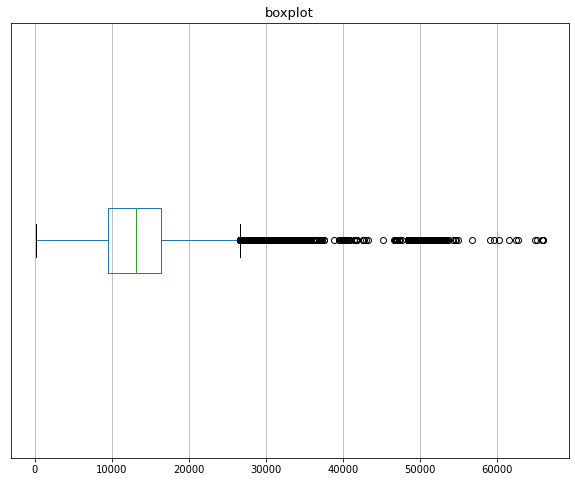

count    17467.000000
mean     14332.056736
std       8608.237051
min        181.000000
25%       9496.000000
50%      13174.000000
75%      16360.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [72]:
plt.title('Распределение значений удаленности от центра города в м', size=12)
plt.xlabel('расстояние от центра города, м', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['city_centers_nearest'].hist(bins=30, figsize=(8, 6), grid=True)
plt.figure(figsize=(10, 8))
plt.title('boxplot', size=13)
sample_data.boxplot('city_centers_nearest', vert=False)
plt.yticks([])
plt.show()
sample_data['city_centers_nearest'].describe()

Распределение асимметрично вправо, так как у большинства объектов расстояние до центра города не превышает 20 000 метров.
Наблюдается пик в диапазоне от 5 000 до 15 000 метров, что говорит о том, что большинство объектов находится на этом расстоянии от центра.

Есть небольшое количество объектов на расстоянии до 65 968 метров, что является крайним значением.

- Межквартильный размах (IQR) находится в диапазоне 9 496 – 16 360 метров.
- Медиана (50%) — 13 174 метров, что означает, что половина объектов расположена ближе к центру, а половина дальше.

Большинство объектов недвижимости находятся на расстоянии 10–15 км от центра города, а расстояния более 30 км встречаются редко.
Учитывая, что данные по расстоянию до центра города были получены автоматически, а так же с учетом картографического разнообразия и реальной удаленности населенных пунктов пригорода Питера, оставляем выбросы без обработки, так как они отражают реальную картинуи не являются аномалиями.

##### Расстояние до ближайшего парка

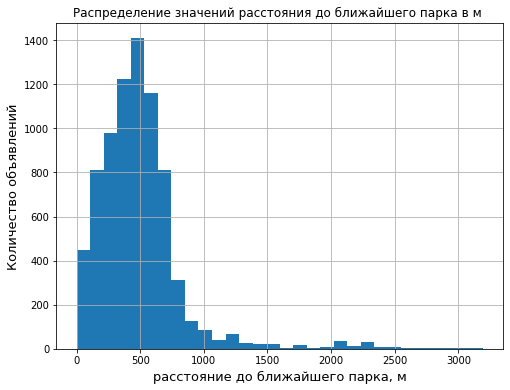

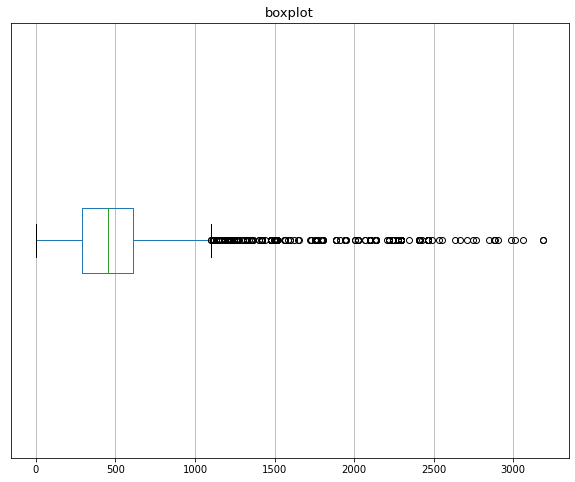

count    7687.000000
mean      492.246780
std       342.885297
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [73]:
plt.title('Распределение значений расстояния до ближайшего парка в м ', size=12)
plt.xlabel('расстояние до ближайшего парка, м', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['parks_nearest'].hist(bins=30, figsize=(8, 6), grid=True)
plt.figure(figsize=(10, 8))
plt.title('boxplot', size=13)
sample_data.boxplot('parks_nearest', vert=False)
plt.yticks([])
plt.show()
sample_data['parks_nearest'].describe()

Распределение асимметрично вправо, так как большинство значений сосредоточено в диапазоне 0–1000 метров.
Наблюдается пик около 300–500 метров, что говорит о том, что в среднем парки находятся на таком расстоянии от объектов недвижимости. Есть небольшое количество объектов, для которых ближайший парк расположен на расстоянии более 2000 метров.

- Межквартильный размах (IQR) от 288 до 611 метров, что означает, что 50% данных лежат в этом диапазоне.
- Медиана (50%) — 456 метров, то есть у половины объектов ближайший парк расположен ближе, чем на 456 м.
- Значения более 1000 метров считаются выбросами, так как их значительно меньше.

Большинство объектов находятся на расстоянии 300–600 метров от ближайшего парка, что можно считать относительно доступным. Однако есть значительное количество выбросов — объекты, расположенные на расстоянии более 1 км от парков.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 

✔ А зачем мы удаляем эти данные? У каждой ли квартиры обязан быть парк поблизости? Тем более такое исключение данных привидет к удалению из датасета всех строк с пропусками в этом столбце.
    

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

#### Быстрая продажа квартиры.

##### Cтолбец days_exposition

Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.

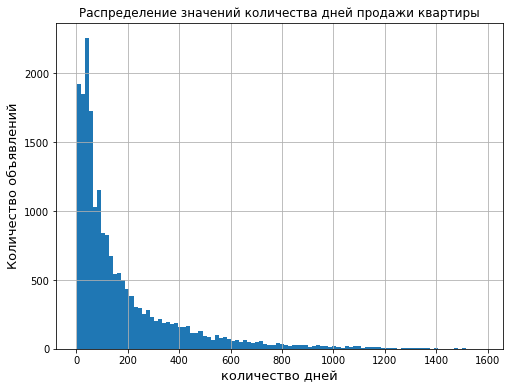

count    19774.000000
mean       179.755386
std        218.564823
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [74]:
plt.title('Распределение значений количества дней продажи квартиры', size=12)
plt.xlabel('количество дней', size=13)
plt.ylabel('Количество объявлений', size=13)
sample_data['days_exposition'].hist(bins=100, figsize=(8, 6), grid=True)
plt.show()
sample_data['days_exposition'].describe()

Среднее время продажи: 179 дней. Это значение может быть искажено за счет длинного хвоста распределения (долгие продажи).
Медиана (50%): 95 дней. Это более надежный показатель, так как не зависит от выбросов.
- 25% квартир продаются за 45 дней или меньше.
- 75% квартир продаются за 385 дней или меньше.
Максимальное значение: 1580 дней (4+ года), что говорит о наличии очень долгих продаж.

Основной пик находится в диапазоне 1–150 дней — это основная масса проданных квартир.

Вывод
- Большинство квартир продаются в диапазоне 45–385 дней (обычные продажи).
- Быстрые продажи — до 45 дней.
- Долгие продажи — более 903 дней, но их мало, и они искажают среднее значение.
- Медианное время продажи — 95 дней, что лучше отражает типичный срок продажи, чем среднее значение (179 дней).

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔Второй пик объясняется заполнением пропусков на этапе предобработки. 
    
✔ При ответе на вопрос о быстрых и долгих продажах лучше обратить внимание на 25 и 75 квартили. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [75]:
# код ревьюера
sample_data.shape[0] / 23699

0.9623190851934681

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Мы лишились практически 70% данных. Это может сильно исказить результаты исследования. 
    
Итоговая потеря данных не должна превышать 10-15% от исходного объема
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

#### Факторы, влияющие на стоимость объекта

##### Общая площадь

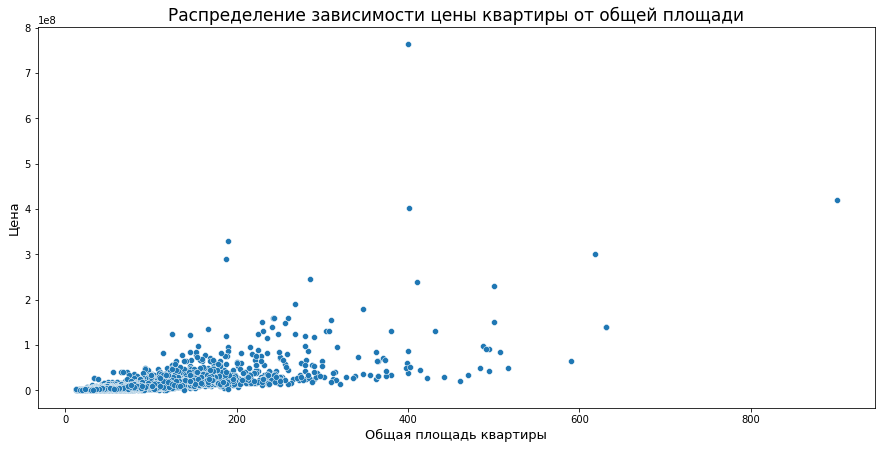

In [76]:
plt.figure(figsize=(15, 7))

sns.scatterplot(data=data,  x='total_area', y='last_price')

plt.title('Распределение зависимости цены квартиры от общей площади', size=17)
plt.xlabel('Общая площадь квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

Ожидаемо, при увеличении общей площади - растет и цена объекта.

In [77]:
sample_data['last_price'].corr(sample_data['total_area'])

0.733573497417724

Коэффициент корреляции 0.73 указывает на высокую положительную корреляцию между ценой (last_price) и общей площадью (total_area):
- Сильная зависимость: С увеличением общей площади недвижимости цена также возрастает. Это ожидаемо, так как большая площадь обычно подразумевает более дорогую недвижимость.
- Не линейная связь: Хотя корреляция высокая, она не достигает значения 1. Это говорит о том, что цена зависит не только от площади, но и от других факторов.
- Практическое значение: При прогнозировании стоимости недвижимости можно считать площадь важным фактором. Однако другие переменные тоже должны быть учтены, чтобы модель предсказания цены была точнее.

Для проверки нелинейных факторов зависимости можно построить, например, логарифмическую модель или визуализировать тренд на графике с линией регрессии.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔ Все библиотеки лучше импортировать в самом начале проекта, в отдельной ячейке. Если в процессе работы появилась необходимость добавить библиотеку, то ее можно дописать в эту ячейку и исполнить.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Коэффициент корреляции для логарифмированных данных: 0.74


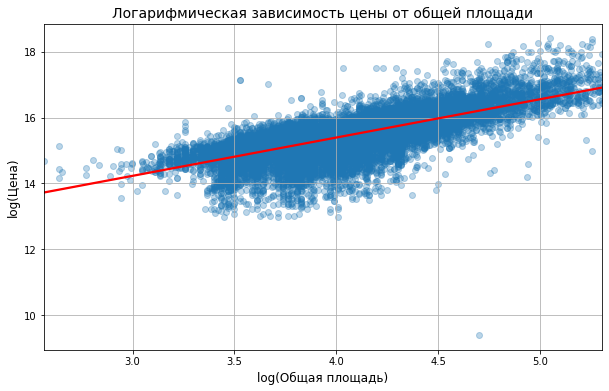

In [78]:
# Добавляем логарифмические столбцы
sample_data['log_last_price'] = np.log1p(sample_data['last_price'])  # log(1 + x), чтобы избежать ошибок с нулями
sample_data['log_total_area'] = np.log1p(sample_data['total_area'])

# Перерасчет корреляции
log_correlation = sample_data['log_total_area'].corr(sample_data['log_last_price'])
print(f"Коэффициент корреляции для логарифмированных данных: {log_correlation:.2f}")

# Построение графика для логарифмических данных
plt.figure(figsize=(10, 6))
sns.regplot(x=sample_data['log_total_area'], y=sample_data['log_last_price'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Логарифмическая зависимость цены от общей площади', fontsize=14)
plt.xlabel('log(Общая площадь)', fontsize=12)
plt.ylabel('log(Цена)', fontsize=12)
plt.grid(True)
plt.show()

Вывод:
   1.    Прямая регрессия: линия хорошо описывает точки, связь между переменными можно считать близкой к линейной.
   2.    Логарифмическая регрессия: корреляция улучшилась (увеличится с 0.73 до 0.74), значит связь между переменными ближе к экспоненциальной.

##### Жилая площадь

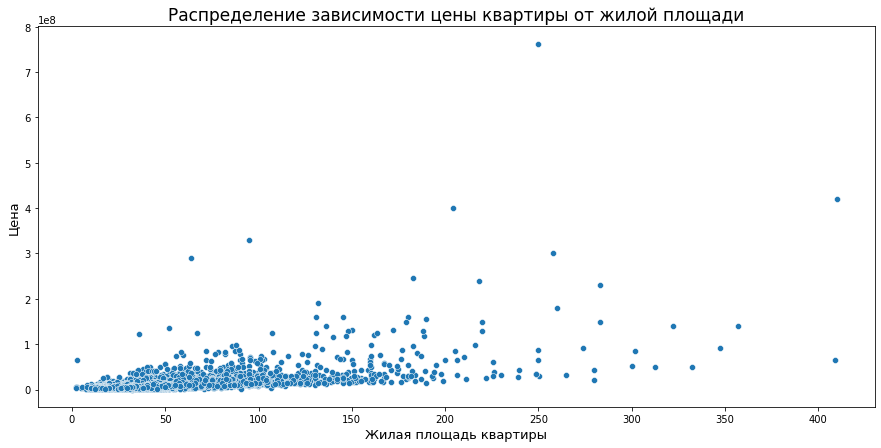

In [79]:
plt.figure(figsize=(15, 7))

sns.scatterplot(data=data,  x='living_area', y='last_price')

plt.title('Распределение зависимости цены квартиры от жилой площади', size=17)
plt.xlabel('Жилая площадь квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

График очень похож на общую площадь, все таки они напрямую зависят друг от друга.

In [80]:
sample_data['last_price'].corr(sample_data['living_area'])

0.6289215766323714

Коэффициент корреляции 0.62 между ценой (last_price) и жилой площадью (living_area) указывает на умеренную положительную зависимость.

Выводы:
1. Связь есть, но слабее: Жилая площадь влияет на стоимость объекта недвижимости, но меньше, чем общая площадь (где корреляция была 0.73). Это связано с тем, что общая площадь включает все пространства (например, кухни, коридоры, балконы), которые также важны для ценообразования.
2. Другие факторы: Цена недвижимости зависит не только от жилой площади. 
3. Практическое значение:
    - При анализе ценообразования жилая площадь — важный фактор, но ее недостаточно для точного прогноза цены.
    - Общая площадь (корреляция 0.73) является более значимым показателем.

##### Площадь кухни

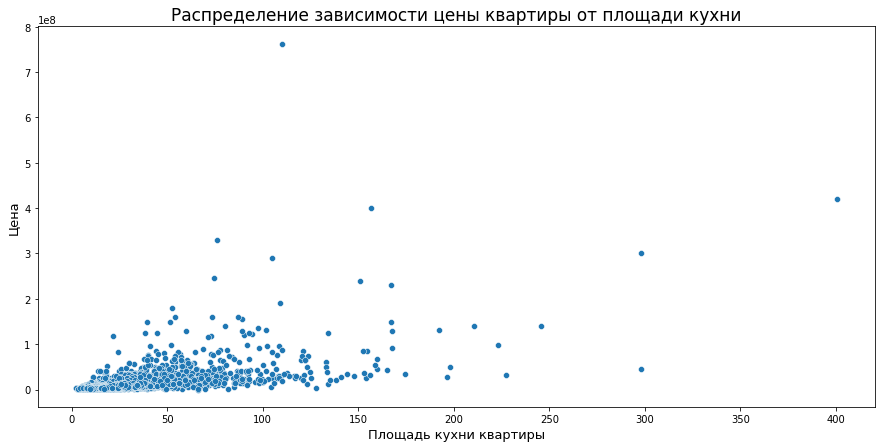

In [81]:
plt.figure(figsize=(15, 7))

sns.scatterplot(data=data,  x='kitchen_area', y='last_price')

plt.title('Распределение зависимости цены квартиры от площади кухни', size=17)
plt.xlabel('Площадь кухни квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 

✔ Линейные графики в данном случае не подходят. Для анализа зависимости между двумя непрерывными переменными обычно используют  `scatterplot`. Показал пример ниже.

Есть [отличная статья](https://habr.com/ru/post/468295/), которая познакомит тебя поближе с разновидностями визуализаций

P.S. Напомню, что каждый график в проекте и оси на нем должны быть подписаны</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

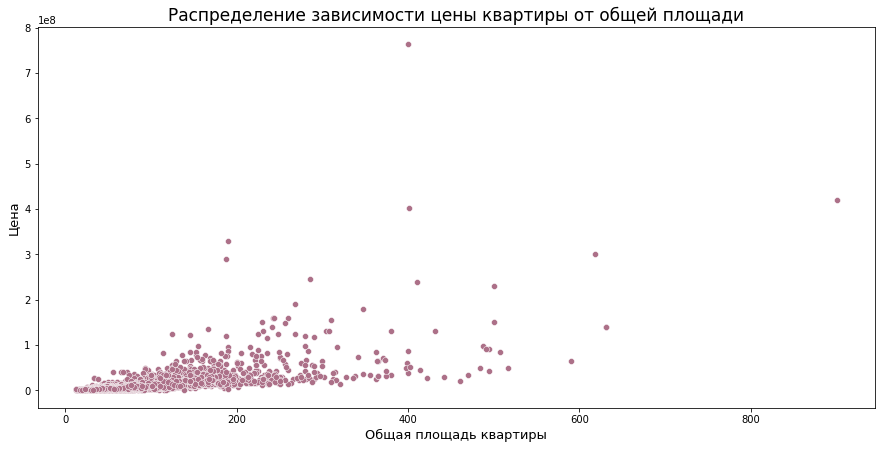

In [82]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(15, 7))

sns.scatterplot(data=data,  x='total_area', y='last_price', color='#AC7088')

plt.title('Распределение зависимости цены квартиры от общей площади', size=17)
plt.xlabel('Общая площадь квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

 С увеличением площади кухни цена недвижимости, как правило, возрастает.

In [83]:
sample_data['last_price'].corr(sample_data['kitchen_area'])

0.6748465124316272

Коэффициент корреляции 0.67 между ценой недвижимости и площадью кухни говорит о умеренной положительной зависимости, даже немного большей, чем для жилой площади (0.62), но меньшей для жилой площади (0.73).
Вывод
   - Все три параметра — общая площадь, жилая площадь и площадь кухни — положительно коррелируют с ценой, но с разной степенью влияния.
   - Наиболее значимым фактором остается общая площадь (0.73), но площадь кухни (0.67) играет даже более важную роль, чем жилая площадь (0.62).
   - Возможно, просторные кухни являются значимым преимуществом для покупателей, что может отражать рыночные предпочтения.

##### Количество комнат

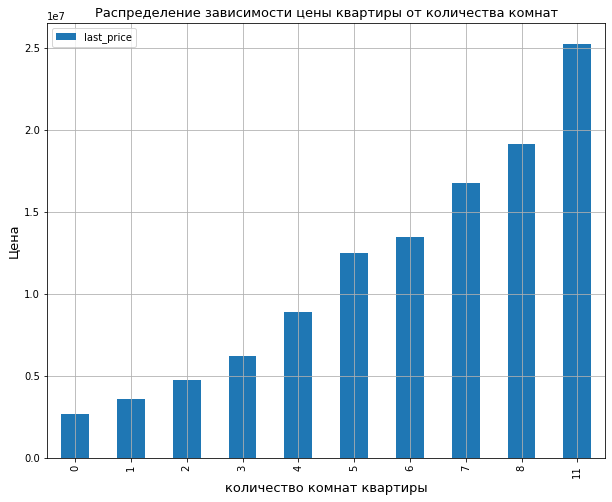

In [84]:
(
    sample_data
    .pivot_table(values='last_price', index='rooms', aggfunc='median')
    .plot(grid=True, figsize=(10, 8), subplots=True, kind='bar')
)
plt.title('Распределение зависимости цены квартиры от количества комнат', size=13)
plt.xlabel('количество комнат квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔ 
   Круговую диаграмму обычно используют для визуализации соотношения в %. Здесь подойдет барплот</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [85]:
sample_data['last_price'].corr(sample_data['rooms'])

0.4375382191913245

Коэффициент корреляции 0.43 между ценой недвижимости (last_price) и количеством комнат говорит о слабой положительной зависимости.

Выводы:
- Связь есть, но слабая. Количество комнат влияет на цену, но не так сильно, как площадь недвижимости. Это связано с тем, что одинаковое количество комнат может быть в объектах разной площади (например, однокомнатные квартиры могут быть и 30 м², и 50 м²), а цена больше зависит от площади, чем от количества комнат.
- Другие факторы важнее. Цена квартиры больше связана с характеристиками площади, а не с количеством комнат. Например, студии и однокомнатные квартиры в центральных районах могут стоить дороже, чем большие квартиры на окраинах.
- Количество комнат само по себе не является ключевым фактором для определения цены. Оно важно в сочетании с другими характеристиками, такими как площадь, расположение и качество ремонта. 
- Для прогнозирования цены лучше использовать площадь как основной фактор, а количество комнат — как вспомогательный.

##### Тип этажа

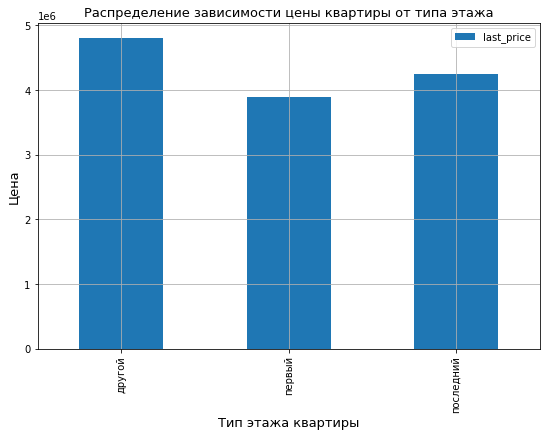

In [86]:
(
    sample_data
    .pivot_table(values='last_price', index='floor_type', aggfunc='median')
    .plot(grid=True, figsize=(9, 6), subplots=True, kind='bar')
)
plt.title('Распределение зависимости цены квартиры от типа этажа', size=13)
plt.xlabel('Тип этажа квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

In [87]:
# Преобразование строк в числовые значения
floor_mapping = {'первый': 0, 'последний': 1, 'другой': 2}
sample_data['floor_type_numeric'] = sample_data['floor_type'].map(floor_mapping)

# Расчет корреляции
sample_data['last_price'].corr(sample_data['floor_type_numeric'])

0.10129487347181385

Коэффициент корреляции 0.1 указывает на очень слабую положительную связь между ценой недвижимости и типом этажа (первый, последний, другой). Это означает, что тип этажа почти не влияет на цену недвижимости, и если существует какая-то связь, она очень слабая. В данном случае можно сказать, что тип этажа не является значимым фактором при определении цены недвижимости. Это так же подтверждает график, последний и другой этаж почти равны по цене, чуть дешевле, только первый этаж.

##### Дата размещения

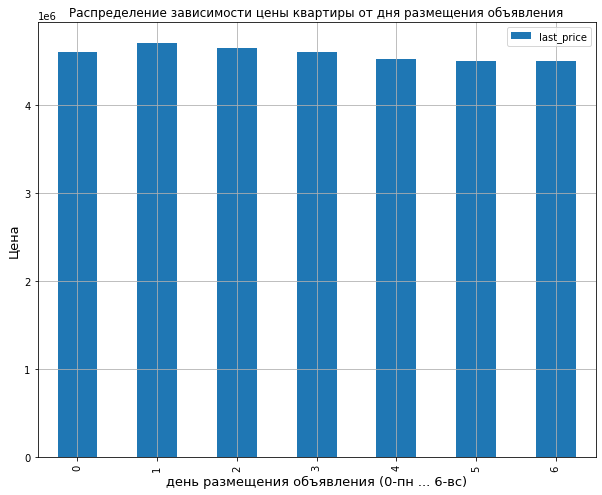

In [88]:
(
    sample_data
    .pivot_table(values='last_price', index='publication_day', aggfunc='median')
    .plot(grid=True, figsize=(10, 8), subplots=True, kind='bar')
)
plt.title('Распределение зависимости цены квартиры от дня размещения объявления', size=12)
plt.xlabel('день размещения объявления (0-пн ... 6-вс)', size=13)
plt.ylabel('Цена', size=13)

plt.show()

По вторникам, средам и четвергам квартиры продаются лучше. Но сильной зависимости не прослеживается.

In [89]:
sample_data['last_price'].corr(sample_data['publication_day'])

-0.011408673479835534

Коэффициент корреляции -0,011 указывает на практически отсутствующую линейную связь между ценой недвижимости и днем публикации. То есть, если вообще существует какая-либо зависимость, она настолько слабая, что практически не влияет на цену. Следовательно, день публикации (понедельник, вторник и т.д.) не является значимым фактором в определении стоимости недвижимости.

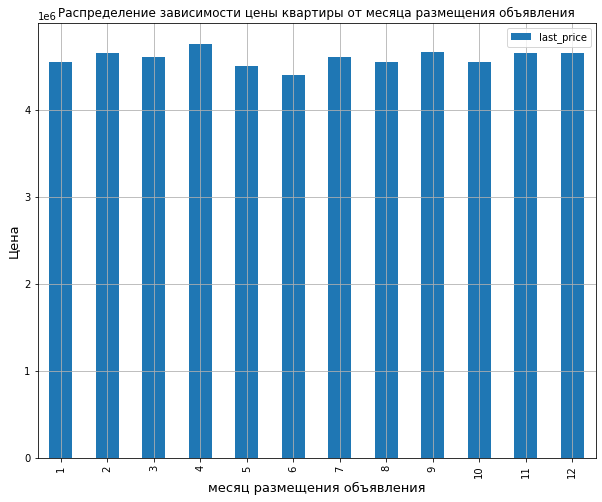

In [90]:
(
    sample_data
    .pivot_table(values='last_price', index='publication_month', aggfunc='median')
    .plot(grid=True, figsize=(10, 8), subplots=True, kind='bar')
)
plt.title('Распределение зависимости цены квартиры от месяца размещения объявления', size=12)
plt.xlabel('месяц размещения объявления', size=13)
plt.ylabel('Цена', size=13)

plt.show()

Средние цены примерно одинаковы в течении года, что говорит о том, что рынок недвижимости в данном регионе не подвержен сезонным колебаниям и отличается стабильным спросом.

In [91]:
sample_data['last_price'].corr(sample_data['publication_month'])

0.0066543311746579984

Коэффициент корреляции -0,006 указывает на практически отсутствие линейной связи между ценой недвижимости и месяцем публикации. Это означает, что выбор месяца для публикации не оказывает значительного влияния на стоимость недвижимости.

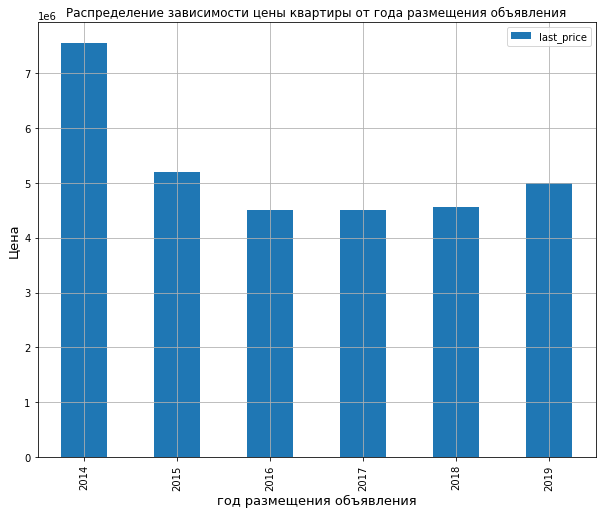

In [92]:
(
    sample_data
    .pivot_table(values='last_price', index='publication_year', aggfunc='median')
    .plot(grid=True, figsize=(10, 8), subplots=True, kind='bar')
)
plt.title('Распределение зависимости цены квартиры от года размещения объявления', size=12)
plt.xlabel('год размещения объявления', size=13)
plt.ylabel('Цена', size=13)

plt.show()

In [93]:
sample_data['last_price'].corr(sample_data['publication_year'])

-0.04634623040171359

Коэффициент корреляции -0,04 указывает на практически отсутствующую линейную связь между годом публикации объявления и ценой продажи. Однако явный скачок на графике в 2014 году может свидетельствовать о структурном разрыве или резком изменении рыночных условий в этот период.
- Линейная зависимость отсутствует: Коэффициент корреляции измеряет только линейную связь, и если зависимость имеет разрывный или нелинейный характер, она может не отражаться в значении корреляции.
- Возможны внешние факторы. Резкий скачок в 2014 году может быть обусловлен изменениями в экономической ситуации, законодательстве или другими внешними факторами, которые резко повлияли на цены.

Таким образом, несмотря на низкий коэффициент корреляции, визуальный разрыв на графике указывает на важное изменение, которое стоит изучить более подробно.

В 2014 году в России произошли значимые события, которые могли оказать влияние на экономическую ситуацию и, как следствие, на рынок недвижимости. Среди них можно выделить:
   - Аннексия Крыма и конфликт на востоке Украины: Эти события привели к ухудшению отношений с западными странами, что вызвало волну санкций против России.
   - Введение санкций: Санкции, введенные США, ЕС и другими странами, оказали влияние на финансовые рынки, инвестиционный климат и общий экономический рост.
   - Падение цен на нефть: Снижение мировых цен на нефть, являющуюся ключевым экспортным товаром для России, привело к ухудшению доходной части бюджета и, как следствие, к экономическому спаду.
   - Обесценивание рубля: Санкции и падение нефтяных цен способствовали значительному ослаблению национальной валюты, что отразилось на покупательной способности населения и условиях кредитования.

Эти факторы могли привести к структурным изменениям в экономике, что нашло отражение в скачке цен на недвижимость в 2014 году, даже если общий коэффициент линейной корреляции остаётся низким.

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [94]:
# Получаем список топ-10 населенных пунктов с наибольшим количеством объявлений
top_cities = sample_data['locality_name'].value_counts().head(10).index
# Фильтруем данные по этим 10 населенным пунктам
top_cities_data = sample_data.query('locality_name in @top_cities')
# Делаем сводную таблицу по количеству обьявлений и средней стоимости 1 квадратного метра
top_cities_pivot = top_cities_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'mean'])
# Переименовываем столбцы
top_cities_pivot.columns = ['count', 'price_per_sqm'] 
# Сортируем по возрастанию
top_cities_pivot.sort_values(by='price_per_sqm', ascending=False)

,count,price_per_sqm
locality_name,,
санкт-петербург,15098,112876.552844
пушкин,356,102916.217978
деревня кудрово,295,92251.993627
поселок парголово,322,90237.134099
поселок мурино,542,85378.573782
поселок шушары,435,78525.266299
колпино,332,75400.360934
гатчина,300,68694.019567
всеволожск,385,68500.648468


Самая высокая стоимость 1 кв.м. в г. Санкт-Петербург и составляет 112 876,55 рублей

Самая низкая - в населенном пункте Выборг - 58 526,6 руб.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔ Результат получился не совсем корректный из-за потери данных.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

#### Зависимость цены от удаления от центра города

Изучим, как стоимость объектов зависит от расстояния до центра города 

In [95]:
# Получим список данных только по Питеру
data_piter = sample_data.query('locality_name == "санкт-петербург"')
#уберем nan
#data_piter = data_piter.dropna(subset=['distance_to_city_center'])
# Узнаем максимальную удаленность обьекта от центра
data_piter['distance_to_city_center'].max()

29.0

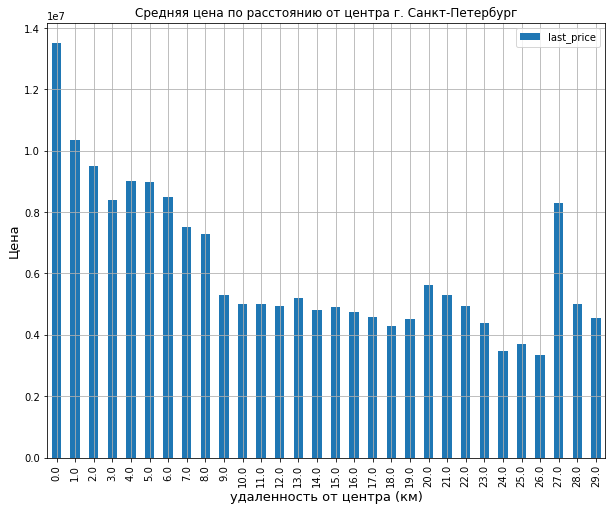

In [96]:
(
    data_piter
    .pivot_table(values='last_price', index='distance_to_city_center', aggfunc='median')
    .plot(grid=True, figsize=(10, 8), subplots=True, kind='bar')
)
plt.title('Средняя цена по расстоянию от центра г. Санкт-Петербург', size=12)
plt.xlabel('удаленность от центра (км)', size=13)
plt.ylabel('Цена', size=13)

plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔  Мы ведь округляли расстояния до целых чисел. Для чего мы здесь группируем их по диапазонам в 1 км? График можно построить сразу по имеющимся значениям</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Общие тенденции:
   - В целом, наблюдается закономерное снижение средней цены недвижимости по мере удаления от центра города.
   - В центральных районах (0-5 км) цены держатся на наивысшем уровне – около 12-14 млн рублей.
   - После 5-7 км начинается постепенное снижение цен, которое продолжается вплоть до 20 км.
   - В диапазоне 10-20 км цены стабилизируются, колеблясь в пределах 5-7 млн рублей.

Аномальные пики на графике:
   - Резкий скачок цен в диапазоне 25-26 км
   - Данный пик не является рыночным трендом, а связан с особенностями данных. Он обусловлен удвоением объектов около аэропорта Пулково, которые были отнесены на 47 км, но учитывались на 25-26 км.
Основные продажи таких объектов приходились на 2017-2018 годы, что также могло повлиять на среднюю цену.
   - Нестандартно высокая цена на 7-8 км. Возможное объяснение — присутствие элитной недвижимости в этом радиусе, например, в Петроградском и Московском районах.
   - Локальные колебания в пределах 18-22 км. Это может быть связано с тем, что некоторые районы на таком удалении (например, Пушкин, Павловск) имеют более дорогие объекты из-за исторической или загородной элитной застройки.

Выводы:
   - В целом, цена недвижимости закономерно падает с увеличением расстояния от центра города.
   - Однако, на графике видны аномальные пики, связанные с особенностями рынка (элитные районы)
   - Для более точного анализа необходимо рассмотреть аномалии подробнее.

In [97]:
data_piter.query('distance_to_city_center == 26')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,distance_to_city_center,log_last_price,log_total_area,floor_type_numeric
251,17,3340000.0,37.00,2018-03-28,1,2.6,5,19.000000,4,False,False,False,14.300000,0,санкт-петербург,47303.0,25866.0,1,251.0,1,350.0,75.0,90270.27,2,3,2018,другой,26.0,15.021482,3.637586,2
536,13,3250000.0,40.00,2018-06-25,1,2.6,10,22.641509,1,False,False,False,13.358491,0,санкт-петербург,47057.0,25619.0,1,159.0,1,1250.0,45.0,81250.00,0,6,2018,первый,26.0,14.994166,3.713572,0
1234,7,3355000.0,37.77,2017-12-21,1,2.6,12,14.560000,5,False,False,False,19.433000,1,санкт-петербург,47057.0,25619.0,1,159.0,1,1250.0,147.0,88827.11,3,12,2017,другой,26.0,15.025963,3.657647,2
3328,6,3090000.0,33.30,2017-01-17,1,2.6,5,12.000000,4,False,False,False,17.970000,0,санкт-петербург,47039.0,25599.0,1,126.0,1,979.0,489.0,92792.79,1,1,2017,другой,26.0,14.943682,3.535145,2
3764,10,3392333.0,34.51,2018-10-01,1,2.6,5,15.000000,4,False,False,False,16.059000,0,санкт-петербург,47303.0,25865.0,1,400.0,1,492.0,145.0,98300.00,0,10,2018,другой,26.0,15.037029,3.569814,2
3968,5,2950000.0,36.30,2016-12-28,1,2.6,5,15.250000,1,False,False,False,17.420000,0,санкт-петербург,47039.0,25599.0,1,126.0,1,979.0,159.0,81267.22,2,12,2016,первый,26.0,14.897316,3.618993,0
5211,13,3150000.0,50.00,2018-09-04,2,2.6,3,28.000000,3,False,False,False,17.000000,0,санкт-петербург,22180.0,25604.0,0,NaN,0,NaN,30.0,63000.00,1,9,2018,последний,26.0,14.962913,3.931826,1
6125,10,5254628.0,57.39,2018-10-10,3,2.6,5,31.000000,3,False,False,False,20.651000,0,санкт-петербург,47303.0,25866.0,1,251.0,1,350.0,135.0,91559.99,2,10,2018,другой,26.0,15.474620,4.067145,2
6585,10,3230765.0,33.83,2018-10-10,1,2.6,5,14.000000,1,False,False,False,16.447000,0,санкт-петербург,47303.0,25865.0,1,400.0,1,492.0,100.0,95500.00,2,10,2018,первый,26.0,14.988230,3.550479,0
7660,10,3001767.0,35.29,2018-10-01,1,2.6,5,10.000000,4,False,False,False,21.761000,0,санкт-петербург,47204.0,25767.0,1,297.0,1,465.0,145.0,85059.99,0,10,2018,другой,26.0,14.914712,3.591542,2


Все объекты на расстоянии 25-26 км от центра и 47 км от аэропорта относятся к престижному пригороду или исторической территории. Если эти районы относятся к Кронштадту, Курортному району, то там традиционно дороже жилье из-за близости к Финскому заливу, экологичности и престижности.

В 2017-2018 годах в этих районах могли активно строить новые современные жилые комплексы с высокой ценой за квадратный метр. Новые комплексы часто сильно дороже старого фонда, поэтому если в этом районе было мало старых домов, средняя цена выросла.

Пик цены на 25-26 км можно объяснить несколькими факторами:
   - Наличие дорогого жилья в Курортном районе или Кронштадте.
   - Строительство элитных жилых комплексов в 2017-2018 годах.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

✔  А если посмотреть на объявления, которые образуют пик на 27 км. ?</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

### Напишите общий вывод

Проведена предобработка данных архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Изучены отдельные параметры объектов недвижимости, обработаны аномалии и ошибки ввода, удалены редкие, выбивающиемя значения.
Проведен исследовательский анализ данных, который установил:
- При прогнозировании стоимости недвижимости общая площадь обьекта является одним из самых важных факторов.
- общая площадь, жилая площадь и площадь кухни — положительно коррелируют с ценой, но с разной степенью влияния.
- Количество комнат влияет на цену, но не так сильно, как площадь недвижимости. Количество комнат само по себе не является ключевым фактором для определения цены. 
- Тип этажа почти не влияет на цену недвижимости, и если существует какая-то связь, она очень слабая.
- дата публикации не является значимым фактором в определении стоимости недвижимости.
- Самая высокая стоимость 1 кв.м. в г. Санкт-Петербург и составляет 112 876,55 рублей. Самая низкая - в населенном пункте Выборг - 58 526,6 руб.
- Близость к центру города обуславливает более высокую цену на недвижимость в г. Санкт-Петербург.

Среднестатистическая квартира из объявления имеет следующие характеристики:
- общая площадь 52 кв.м.
- жилая площадь 30 кв.м.
- площадь кухни 17 кв.м.
- количество комнат - 2
- 9ти этажные дома
- другой этаж (не 1 и не последний)
- высота потолка 2.6 м
- цена 4,6 млн руб.
- расстояние до центра 13 км
- расстояние до ближайшего парка 400-500 м.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
✔ Можно дополнительно описать основные характеристики "среднестатистической" квартиры из объявления. 
    
    
**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.